In [1]:
load("arranging.sage")

In [2]:
def default_arranging(n,k):
    p = MixedIntegerLinearProgram(maximization=True,solver=my_solver)

    G=graphs.CompleteGraph(n+1)
    for e in G.edges():
        if e[1]-e[0] > k:
            G.delete_edge(e)
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for u in G.vertices():
        equation=0
        for e in G.edges_incident(u):
            equation+=x[e]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)
    
    for i in range(1,k+1):
        equation=0
        for e in G.edges():
            if e[1]-e[0] == i:
                equation+=x[e]
        if i>=2*k-n+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)
    return p,x,G

In [4]:
def arranging_maximizing_small_cuts(n,k,should_print):

    p,x,G=default_arranging(n,k)

# Daqui pra frente definimos o objetivo
    objective=0
#     y=p.new_variable(binary=True)
#     for i in range(n-2):
#         for j in range(i+2,n):
#             H=G.subgraph([i,i+1,j,j+1])
#             equation=0
#             for e in H.edges():
#                 equation+=x[e]
#             p.add_constraint(y[i,i+1,j,j+1] <= (1/3)*equation)
#             objective+=y[i,i+1,j,j+1]
#     p.set_objective(objective)
    
    y=p.new_variable(binary=True)
    for i in range(n-2):
        j=n-i-1
        H=G.subgraph(list(range(i))+list(range(j,n+1)))
        equation=0
        for e in H.edges():
            equation+=x[e]
        p.add_constraint(y[i] <= (1/(H.order()-1))*equation)
        objective+=y[i]
    p.set_objective(objective)
    
    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of parallel pairs: "+str(sol))
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return lista            

In [5]:
def arranging_maximizing_path_blocks(n,k,should_print,blocks):

    p,x,G=default_arranging(n,k)

# Daqui pra frente definimos o objetivo
    objective=0
#     y=p.new_variable(binary=True)
#     for i in range(n-2):
#         for j in range(i+2,n):
#             H=G.subgraph([i,i+1,j,j+1])
#             equation=0
#             for e in H.edges():
#                 equation+=x[e]
#             p.add_constraint(y[i,i+1,j,j+1] <= (1/3)*equation)
#             objective+=y[i,i+1,j,j+1]
#     p.set_objective(objective)
    
    y=p.new_variable(binary=True)
    for block in blocks:
        H=G.subgraph(block)
        equation=0
        for e in H.edges():
            equation+=x[e]
        p.add_constraint(y[i] <= (1/(H.order()-1))*equation)
        objective+=y[i]
    p.set_objective(objective)
    
    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of parallel pairs: "+str(sol))
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return sol,lista            

1 2
1 21


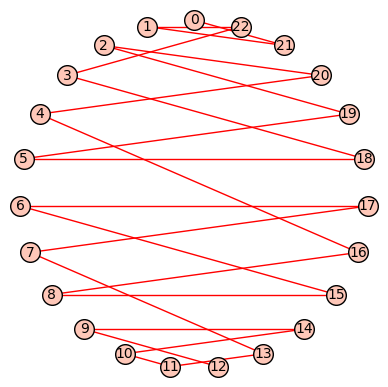

2 3
2 21


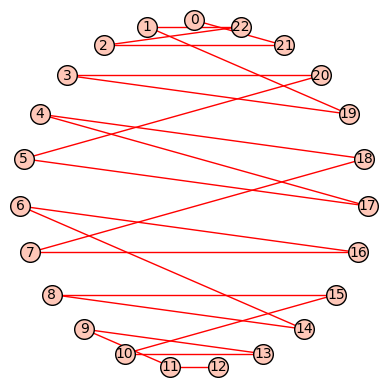

3 4
3 19


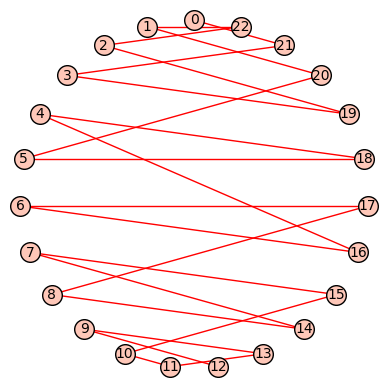

3 20


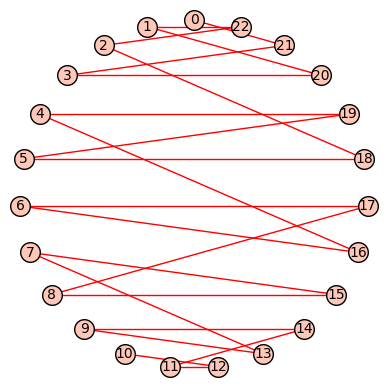

4 5
4 18


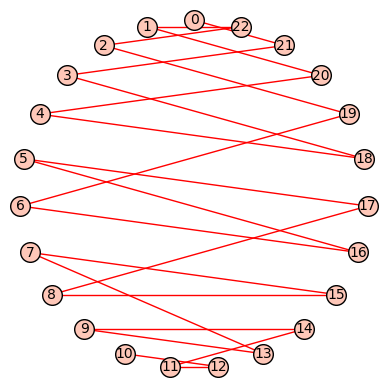

4 19


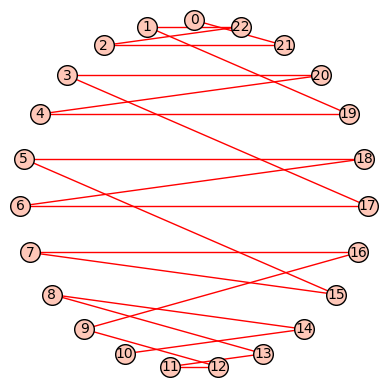

5 6
5 17
5 18


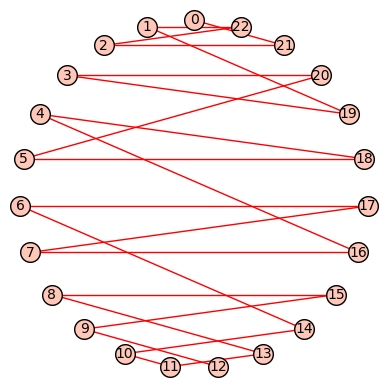

6 7
6 16
6 17
7 8
7 15
7 16
8 9
8 14
8 15
9 10
9 11
9 13
9 14
10 11
10 13
11 12
11 13
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22


In [161]:
n=22
l=1
for i in range(1,n+1):
    for j in range(1,n+1):
        if i<j:
            X=list(range(i+1))+list(range(j,n+1))
            sol,lista=arranging_maximizing_path_blocks(n,n-1,False,[X])
            if sol==1.0:
                print(i,j)
                if len(X)<=n/2:
                    show_solution_vertices(lista)

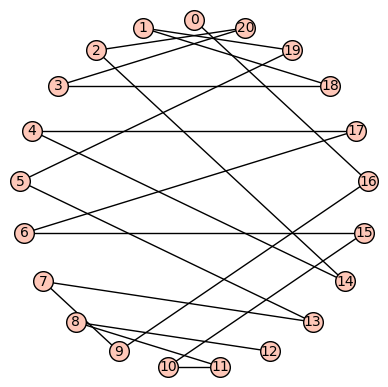

number of parallel pairs: 0.0


(0.0,
 [0, 16, 9, 7, 13, 5, 19, 1, 18, 3, 20, 2, 14, 4, 17, 6, 15, 10, 11, 8, 12])

In [155]:
arranging_maximizing_path_blocks(20,18,True,[list(range(5))+list(range(12,17))]) 

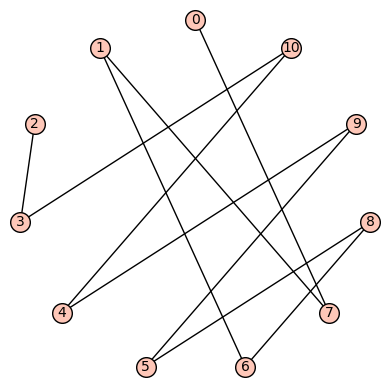

number of parallel pairs: 5.0


[0, 7, 1, 6, 8, 5, 9, 4, 10, 3, 2]

In [84]:
arranging_maximizing_small_cuts(10,7,True)

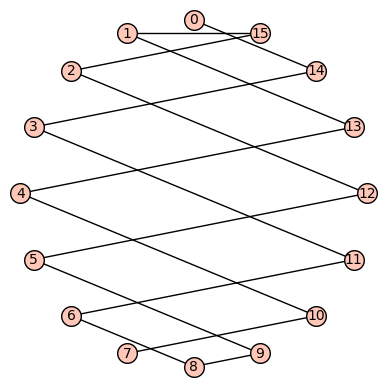

number of parallel pairs: 99.0


[0, 14, 3, 11, 6, 8, 9, 5, 12, 2, 15, 1, 13, 4, 10, 7]

In [64]:
arranging_maximizing_parallels(15,14,True)

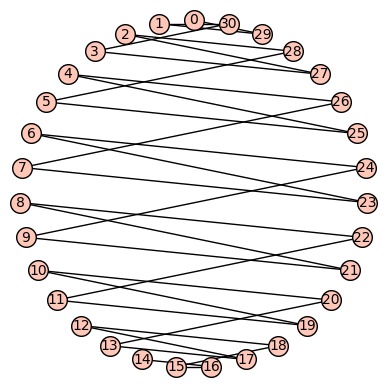

number of parallel pairs: 0.0


[0,
 29,
 1,
 30,
 3,
 27,
 2,
 28,
 5,
 25,
 4,
 26,
 7,
 23,
 6,
 24,
 9,
 21,
 8,
 22,
 11,
 19,
 10,
 20,
 13,
 17,
 12,
 18,
 15,
 16,
 14]

In [55]:
l=1
n=30
k=n-l
arranging_minimizing_parallels(n,k,True)

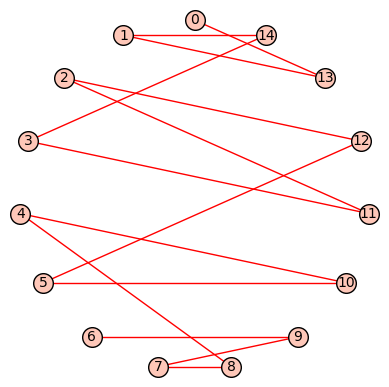

True

In [42]:
P=[0, 13, 1, 14,3,11,2,12, 5, 10, 4, 8, 7, 9, 6]
show_solution_vertices(P)
test_solution_vertices(P,k+4)

In [5]:
def arranging_forced_and_forbidden(n,k,forced,forbidden,should_print):

    p,x,G=default_arranging(n,k)

    for e in forced:
        p.add_constraint(x[e]==1)
        
    for e in forbidden:
        p.add_constraint(x[e]==0)
    
    
    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of parallel pairs: "+str(sol))
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return lista         

In [17]:
def forced_block(n,i,j):
    forced=[(i+1,j+3),(i+1,j),(i,j),(i,j+1),(i+3,j+1)]
    forbidden=[]
    for ii in range(i+2,j):
        for jj in list(range(0,i))+list(range(j+2,n+1)):
            x=min(ii,jj)
            y=max(ii,jj)
            if (x,y) not in forced:
                forbidden.append((x,y))
    return nonenize_pairs(forced),nonenize_pairs(forbidden)

entrou em k= 7
entrou em i= 0
entrou em i= 1
entrou em i= 2
entrou em i= 3
entrou em i= 4
entrou em i= 5
entrou em i= 6
entrou em i= 7
entrou em i= 8
entrou em i= 9
entrou em i= 10
entrou em i= 11
entrou em i= 12
entrou em i= 13
entrou em i= 14
entrou em k= 8
entrou em i= 0
entrou em i= 1
entrou em i= 2
entrou em i= 3
entrou em i= 4
entrou em i= 5
entrou em i= 6
entrou em i= 7
entrou em i= 8
entrou em i= 9
entrou em i= 10
entrou em i= 11
entrou em i= 12
entrou em i= 13
entrou em i= 14
entrou em k= 9
entrou em i= 0
entrou em i= 1
entrou em i= 2
entrou em i= 3
entrou em i= 4
entrou em i= 5
entrou em i= 6
entrou em i= 7
entrou em i= 8
entrou em i= 9
entrou em i= 10
entrou em i= 11
entrou em i= 12
entrou em i= 13
entrou em i= 14
entrou em k= 10
entrou em i= 0
entrou em i= 1
entrou em i= 2
entrou em i= 3
entrou em i= 4
entrou em i= 5
entrou em i= 6
entrou em i= 7
entrou em i= 8
entrou em i= 9
entrou em i= 10
entrou em i= 11
entrou em i= 12
entrou em i= 13
entrou em i= 14
entrou em k= 11
ent

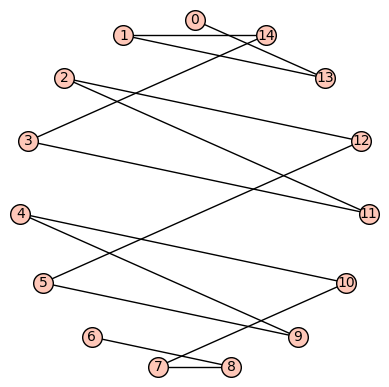

number of parallel pairs: 0.0
deu certo para i,j,k =  2 11 13
[(0, 4, None), (1, 4, None), (4, 13, None), (4, 14, None), (0, 5, None), (1, 5, None), (5, 13, None), (5, 14, None), (0, 6, None), (1, 6, None), (6, 13, None), (6, 14, None), (0, 7, None), (1, 7, None), (7, 13, None), (7, 14, None), (0, 8, None), (1, 8, None), (8, 13, None), (8, 14, None), (0, 9, None), (1, 9, None), (9, 13, None), (9, 14, None), (0, 10, None), (1, 10, None), (10, 13, None), (10, 14, None)]
entrou em i= 3
entrou em i= 4


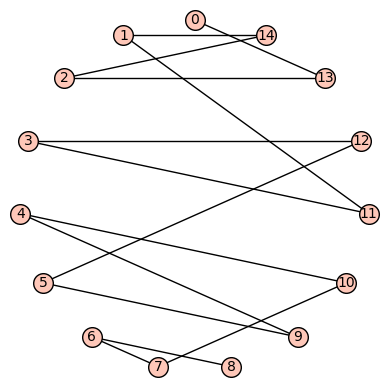

number of parallel pairs: 0.0
deu certo para i,j,k =  4 9 13
[(0, 6, None), (1, 6, None), (2, 6, None), (3, 6, None), (6, 11, None), (6, 12, None), (6, 13, None), (6, 14, None), (0, 7, None), (1, 7, None), (2, 7, None), (3, 7, None), (7, 11, None), (7, 12, None), (7, 13, None), (7, 14, None), (0, 8, None), (1, 8, None), (2, 8, None), (3, 8, None), (8, 11, None), (8, 12, None), (8, 13, None), (8, 14, None)]
entrou em i= 5
entrou em i= 6
entrou em i= 7
entrou em i= 8
entrou em i= 9
entrou em i= 10
entrou em i= 11
entrou em i= 12
entrou em i= 13
entrou em i= 14


In [19]:
n=14
for k in range(ceil(n/2),n):
    print("entrou em k=",k)
    for i in range(n+1):
        print("entrou em i=",i)
        for j in range(n+1):
            if i+3<=j and j+3<=n:
                forced,forbidden=forced_block(n,i,j)
                try:
                    arranging_forced_and_forbidden(n,k,forced,forbidden,True)
                except:
                    pass
                else:
                    print("deu certo para i,j,k = ",i,j,k)
                    print(forbidden)

In [59]:
def basic_zigzag(n,z):
    i=0
    j=z
    result=[(i,j),(i+1,j)]
    while i<j-2:
        i+=1
        j-=1
        result.append((i,j))
        if i+1!=j:
            result.append((i+1,j))
    return result

def non_basic_zigzag(n,z):
    i=0
    j=z
    result=[(i,j),(j,n),(j+1,n),(j+1,n-1)]
    i=n
    j=j+1
    while i>j+2:
        i-=1
        j+=1
        result.append((j,i))
        result.append(j+1,i-1)
    return result

non_basic_zigzag(13,4)

[(0, 4), (4, 13), (5, 13), (5, 12), (6, 12), (7, 11), (8, 10)]

erro
erro


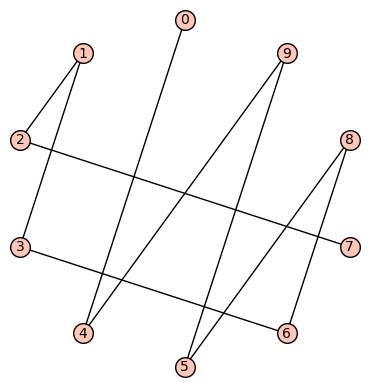

number of parallel pairs: 0.0
erro
erro
erro
erro
erro


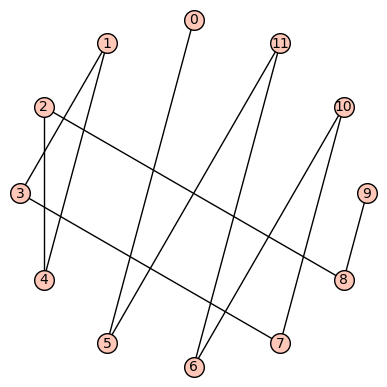

number of parallel pairs: 0.0


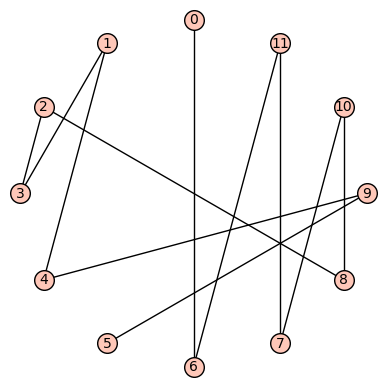

number of parallel pairs: 0.0
erro
erro
erro
erro
erro
erro


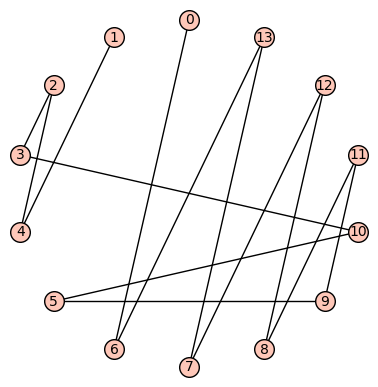

number of parallel pairs: 0.0


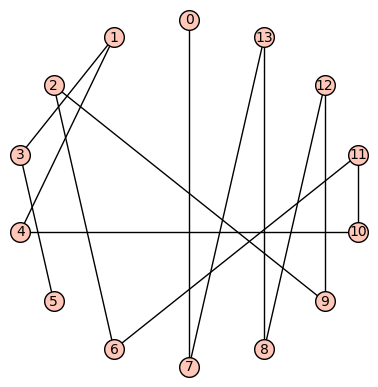

number of parallel pairs: 0.0
erro
erro
erro
erro
erro
erro
erro
erro


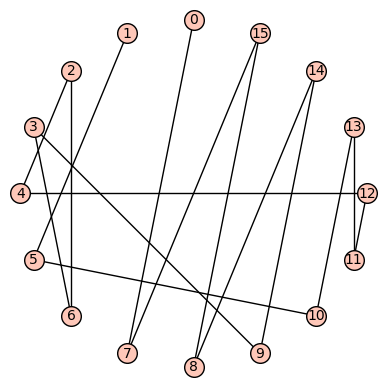

number of parallel pairs: 0.0


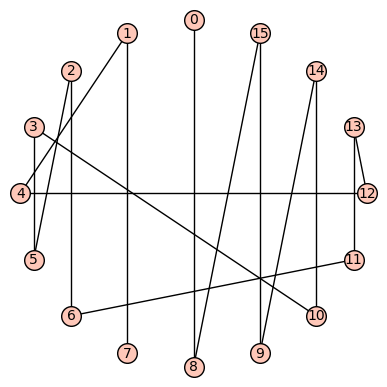

number of parallel pairs: 0.0
erro
erro
erro
erro
erro
erro
erro
erro
erro
erro


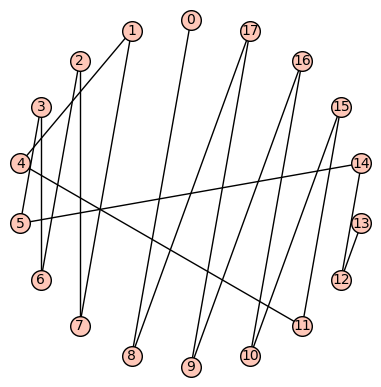

number of parallel pairs: 0.0
erro
erro
erro
erro
erro
erro


In [53]:
for r in range(5,10):
    n=2*r-1
    #arranging_maximizing_parallels(n,ceil(n/2),True)
    for z in range(2,n-2):
        forced=non_basic_zigzag(n,z)
        try:
            arranging_forced_and_forbidden(n,ceil(n/2),nonenize_pairs(forced),[],True)
        except:
            print("erro")

In [2]:
def double_arranging(n,k1,k2):
    p = MixedIntegerLinearProgram(maximization=True,solver=my_solver)

    G1=graphs.CompleteGraph(n+1)
    for e in G1.edges():
        if e[1]-e[0] > k1:
            G1.delete_edge(e)
    
    G2=graphs.CompleteGraph(n+1)
    for e in G2.edges():
        if e[1]-e[0] > k2:
            G2.delete_edge(e)
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for u in G1.vertices():
        equation=0
        for e in G1.edges_incident(u):
            equation+=x[e,1]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)

    for i in range(1,k1+1):
        equation=0
        for e in G1.edges():
            if e[1]-e[0] == i:
                equation+=x[e,1]
        if i>=2*k1-n+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)
            
    for u in G2.vertices():
        equation=0
        for e in G2.edges_incident(u):
            equation+=x[e,2]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)

    for i in range(1,k2+1):
        equation=0
        for e in G2.edges():
            if e[1]-e[0] == i:
                equation+=x[e,2]
        if i>=2*k2-n+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)   

    return p,x,G1,G2

In [3]:
def double_arranging_maximizing_similarity(n,k1,k2,should_print):

    p,x,G1,G2=double_arranging(n,k1,k2)

    y=p.new_variable(binary=True)
    objective=0    
    for e in G1.edges():
        u,v,label=e
        if G2.has_edge(u,v):
            p.add_constraint(x[e,1]-x[e,2]<=1-y[e])
            p.add_constraint(x[e,2]-x[e,1]<=1-y[e])
        objective+=y[e]
    p.set_objective(objective)
    
    sol=p.solve()
    solution=p.get_values(x).items()
    R1=[]
    R2=[]
    for s in solution:
        if s[1]==1:
            if s[0][1]==1:
                R1.append(s[0][0])
            if s[0][1]==2:
                R2.append(s[0][0])
    H1=Graph(R1)
    H2=Graph(R2)
    
    while H1.is_tree()==False or H2.is_tree()==False:
        if H1.is_tree()==False:
            comps=H1.connected_components()
            for comp in comps:
                X=H1.subgraph(comp)
                if X.size() > X.order()-1:
                    equation=0
                    for e in X.edges():
                        equation+=x[e,1]
                    p.add_constraint(equation<=X.order()-1)
            
        if H2.is_tree()==False:
            comps=H2.connected_components()
            for comp in comps:
                X=H2.subgraph(comp)
                if X.size() > X.order()-1:
                    equation=0
                    for e in X.edges():
                        equation+=x[e,2]
                    p.add_constraint(equation<=X.order()-1)

        sol=p.solve()
        solution=p.get_values(x).items()
        R1=[]
        R2=[]
        for s in solution:
            if s[1]==1:
                if s[0][1]==1:
                    R1.append(s[0][0])
                if s[0][1]==2:
                    R2.append(s[0][0])
        H1=Graph(R1)
        H2=Graph(R2)
    
    sol=0
    for e in H1.edges():
        u,v,label=e
        if H2.has_edge(u,v):
            H1.set_edge_label(u,v,1)
            H2.set_edge_label(u,v,1)
            sol+=1

    if should_print:    
        H1.show(layout="circular",color_by_label=True)
        H2.show(layout="circular",color_by_label=True)
        print("number of simimlar edges: "+str(sol))
    
    lista1=[0]
    u=0
    while H1.order()>=2:
        v=H1.neighbors(u)[0]
        H1.delete_vertex(u)
        lista1.append(v)
        u=v
    lista2=[0]
    u=0
    while H2.order()>=2:
        v=H2.neighbors(u)[0]
        H2.delete_vertex(u)
        lista2.append(v)
        u=v
    return lista1,lista2  

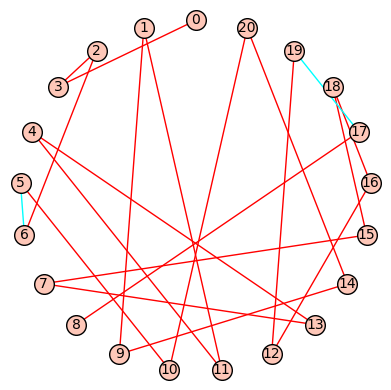

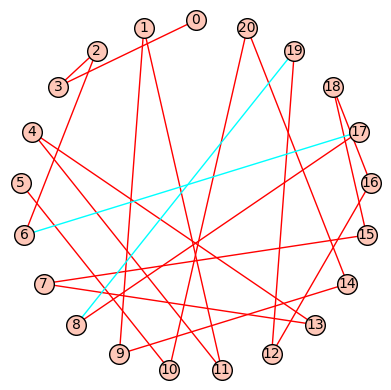

number of simimlar edges: 18


([0, 3, 2, 6, 5, 10, 20, 14, 9, 1, 11, 4, 13, 7, 15, 18, 16, 12, 19, 17, 8],
 [0, 3, 2, 6, 17, 8, 19, 12, 16, 18, 15, 7, 13, 4, 11, 1, 9, 14, 20, 10, 5])

In [4]:
double_arranging_maximizing_similarity(20,10,11,True)

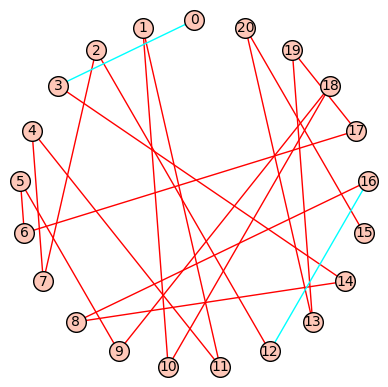

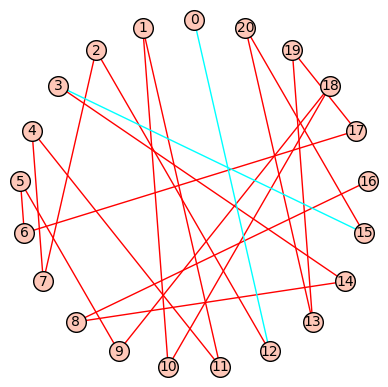

number of simimlar edges: 18


([0, 3, 14, 8, 16, 12, 2, 7, 4, 11, 1, 10, 18, 9, 5, 6, 17, 19, 13, 20, 15],
 [0, 12, 2, 7, 4, 11, 1, 10, 18, 9, 5, 6, 17, 19, 13, 20, 15, 3, 14, 8, 16])

In [5]:
double_arranging_maximizing_similarity(20,11,12,True)

In [39]:
def multi_arranging(n):
    p = MixedIntegerLinearProgram(maximization=True,solver=my_solver)
    
    Glist={}
    
    for k in range(ceil(n/2),n):
        G=graphs.CompleteGraph(n+1)
        for e in G.edges():
            if e[1]-e[0] > k:
                G.delete_edge(e)
        Glist[k]=G
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for k in range(ceil(n/2),n):
        for u in G.vertices():
            equation=0
            for e in G.edges_incident(u):
                equation+=x[e,k]
            if u==0:
                p.add_constraint(equation==1)
            else:
                p.add_constraint(equation<=2)

        for i in range(1,k+1):
            equation=0
            for e in G.edges():
                if e[1]-e[0] == i:
                    equation+=x[e,k]
            if i>=2*k-n+1:
                p.add_constraint(equation==2)
            else:
                p.add_constraint(equation==1) 

    return p,x,Glist

def multi_arranging_maximizing_similarity(n,should_print):

    p,x,Glist=multi_arranging(n)
    y=p.new_variable(binary=True)
    w=p.new_variable(integer=True,nonnegative=True)
    
    for k in range(ceil(n/2),n-1):
        changes=0
        G1=Glist[k]
        G2=Glist[k+1]
        for e in G1.edges():
            u,v,label=e
            if G2.has_edge(u,v):
                p.add_constraint(x[e,1]-x[e,2]<=1-y[e,k])
                p.add_constraint(x[e,2]-x[e,1]<=1-y[e,k])
            changes+=y[e,k]
        p.add_constraint(changes>=w[1])
        
    p.set_objective(w[1])
    
    sol=p.solve()
    solution=p.get_values(x).items()
    Rlist={}
    for k in range(ceil(n/2),n):
        Rlist[k]=[]
        
    for s in solution:
        if s[1]==1:
            k=s[0][1]
            Rlist[k].append(s[0][0])
    Hlist=[]
    for k in range(ceil(n/2),n):
        H=Graph(Rlist[k])
        Hlist.append((copy(H),k))
                   
    all_trees=True
    for pair in Hlist:
        H,k=pair
        if H.is_tree()==False:
            all_trees=False
                   
    while all_trees==False:
        for pair in Hlist:
            H,k=pair
            if H.is_tree()==False:
                comps=H.connected_components()
                for comp in comps:
                    X=H.subgraph(comp)
                    if X.size() > X.order()-1:
                        equation=0
                        for e in X.edges():
                            equation+=x[e,k]
                        p.add_constraint(equation<=X.order()-1)


        sol=p.solve()
        solution=p.get_values(x).items()
        Rlist={}
        for k in range(ceil(n/2),n):
            Rlist[k]=[]

        for s in solution:
            if s[1]==1:
                k=s[0][1]
                Rlist[k].append(s[0][0])
        Hlist=[]
        for k in range(ceil(n/2),n):
            H=Graph(Rlist[k])
            Hlist.append((copy(H),k))

        all_trees=True
        for pair in Hlist:
            H,k=pair
            if H.is_tree()==False:
                all_trees=False
    
    maximum=n
    for i in range(ceil(n/2),n-1):
        k=i-ceil(n/2)
        pair1=Hlist[k]
        pair2=Hlist[k+1]
        H1,k=pair1
        H2,k=pair2
        similar=0
        for e in H1.edges():
            u,v,label=e
            if H2.has_edge(u,v):
                similar+=1
        maximum=min(maximum,similar)
    
    if should_print:
        for pair in Hlist:
            H,k=pair
            H.show(layout="circular",color_by_label=True)
        print("number of simimlar edges: "+str(maximum))
    """
    lista1=[0]
    u=0
    while H1.order()>=2:
        v=H1.neighbors(u)[0]
        H1.delete_vertex(u)
        lista1.append(v)
        u=v
    lista2=[0]
    u=0
    while H2.order()>=2:
        v=H2.neighbors(u)[0]
        H2.delete_vertex(u)
        lista2.append(v)
        u=v
    return lista1,lista2  
    """

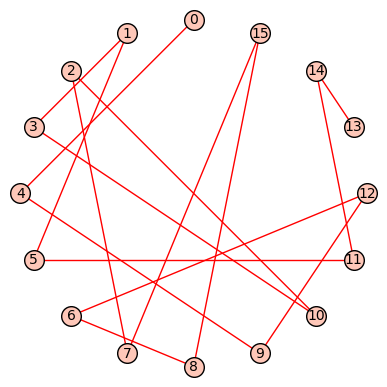

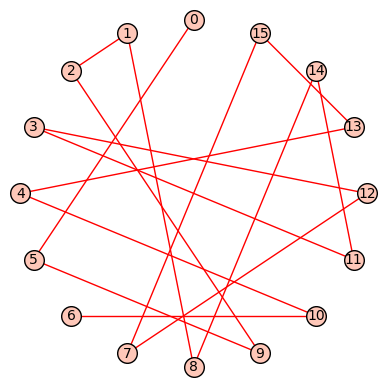

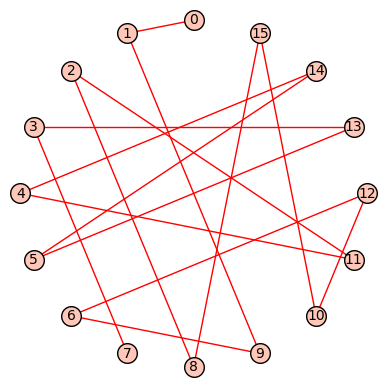

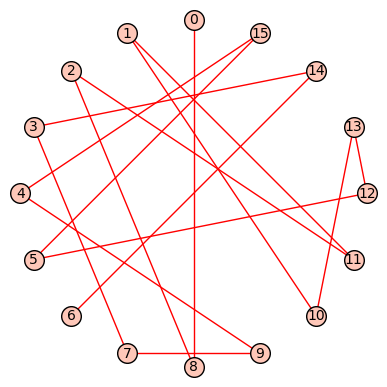

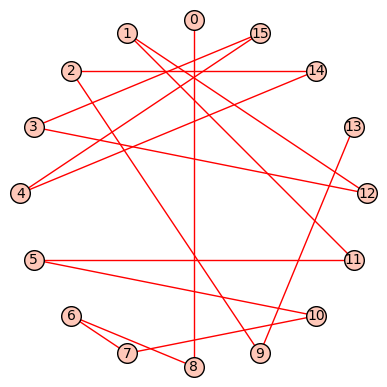

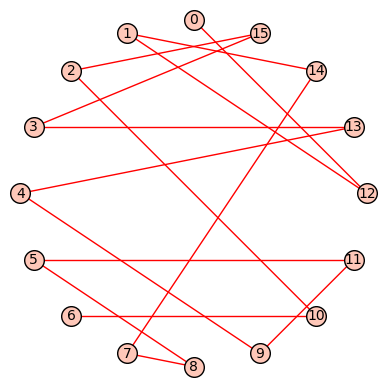

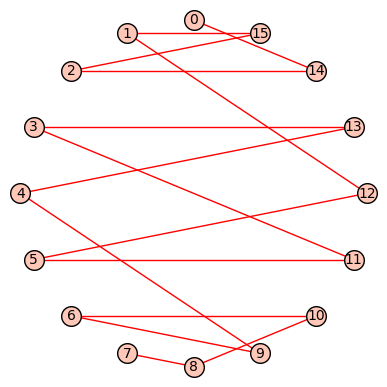

number of simimlar edges: 0


In [40]:
multi_arranging_maximizing_similarity(15,True)

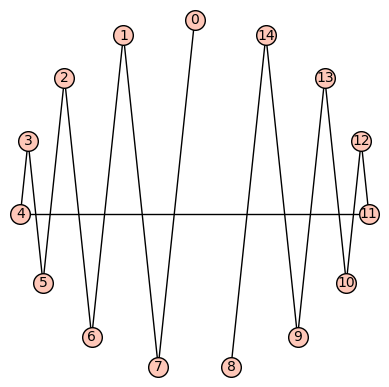

number of parallel pairs: 86.0


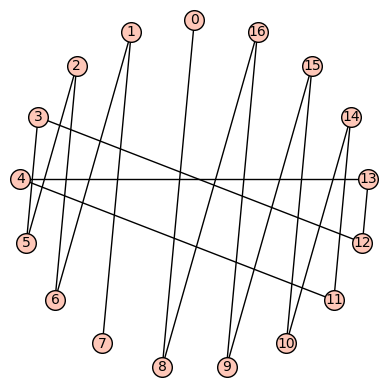

number of parallel pairs: 94.0


[0, 8, 16, 9, 15, 10, 14, 11, 4, 13, 12, 3, 5, 2, 6, 1, 7]

In [16]:
arranging_maximizing_parallels(14,7,True)
arranging_maximizing_parallels(16,9,True)


In [19]:
def induce_arranging(n1,k1,n2,k2):
    p = MixedIntegerLinearProgram(maximization=True,solver=my_solver)

    G1=graphs.CompleteGraph(n1+1)
    for e in G1.edges():
        if e[1]-e[0] > k1:
            G1.delete_edge(e)
    
    G2=graphs.CompleteGraph(n2+1)
    for e in G2.edges():
        if e[1]-e[0] > k2:
            G2.delete_edge(e)
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for u in G1.vertices():
        equation=0
        for e in G1.edges_incident(u):
            equation+=x[e,1]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)

    for i in range(1,k1+1):
        equation=0
        for e in G1.edges():
            if e[1]-e[0] == i:
                equation+=x[e,1]
        if i>=2*k1-n1+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)
            
    for u in G2.vertices():
        equation=0
        for e in G2.edges_incident(u):
            equation+=x[e,2]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)

    for i in range(1,k2+1):
        equation=0
        for e in G2.edges():
            if e[1]-e[0] == i:
                equation+=x[e,2]
        if i>=2*k2-n2+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)   

    return p,x,G1,G2

def induce_arranging_maximizing_similarity(n1,k1,n2,k2,should_print):

    p,x,G1,G2=induce_arranging(n1,k1,n2,k2)

    y=p.new_variable(binary=True)
    objective=0    
    for e in G1.edges():
        u,v,label=e
        if G2.has_edge(u,v):
            p.add_constraint(x[e,1]-x[e,2]<=1-y[e])
            p.add_constraint(x[e,2]-x[e,1]<=1-y[e])
        objective+=y[e]
    p.set_objective(objective)
    
    sol=p.solve()
    solution=p.get_values(x).items()
    R1=[]
    R2=[]
    for s in solution:
        if s[1]==1:
            if s[0][1]==1:
                R1.append(s[0][0])
            if s[0][1]==2:
                R2.append(s[0][0])
    H1=Graph(R1)
    H2=Graph(R2)
    
    while H1.is_tree()==False or H2.is_tree()==False:
        if H1.is_tree()==False:
            comps=H1.connected_components()
            for comp in comps:
                X=H1.subgraph(comp)
                if X.size() > X.order()-1:
                    equation=0
                    for e in X.edges():
                        equation+=x[e,1]
                    p.add_constraint(equation<=X.order()-1)
            
        if H2.is_tree()==False:
            comps=H2.connected_components()
            for comp in comps:
                X=H2.subgraph(comp)
                if X.size() > X.order()-1:
                    equation=0
                    for e in X.edges():
                        equation+=x[e,2]
                    p.add_constraint(equation<=X.order()-1)

        sol=p.solve()
        solution=p.get_values(x).items()
        R1=[]
        R2=[]
        for s in solution:
            if s[1]==1:
                if s[0][1]==1:
                    R1.append(s[0][0])
                if s[0][1]==2:
                    R2.append(s[0][0])
        H1=Graph(R1)
        H2=Graph(R2)
    
    sol=0
    for e in H1.edges():
        u,v,label=e
        if H2.has_edge(u,v):
            H1.set_edge_label(u,v,1)
            H2.set_edge_label(u,v,1)
            sol+=1

    if should_print:    
        H1.show(layout="circular",color_by_label=True)
        H2.show(layout="circular",color_by_label=True)
        print("number of simimlar edges: "+str(sol))
    
    lista1=[0]
    u=0
    while H1.order()>=2:
        v=H1.neighbors(u)[0]
        H1.delete_vertex(u)
        lista1.append(v)
        u=v
    lista2=[0]
    u=0
    while H2.order()>=2:
        v=H2.neighbors(u)[0]
        H2.delete_vertex(u)
        lista2.append(v)
        u=v
    return lista1,lista2  

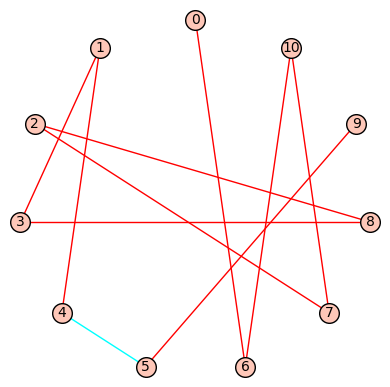

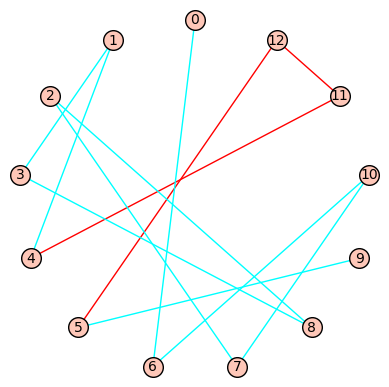

number of simimlar edges: 9


([0, 6, 10, 7, 2, 8, 3, 1, 4, 5, 9],
 [0, 6, 10, 7, 2, 8, 3, 1, 4, 11, 12, 5, 9])

In [25]:
induce_arranging_maximizing_similarity(10,6,12,7,True)

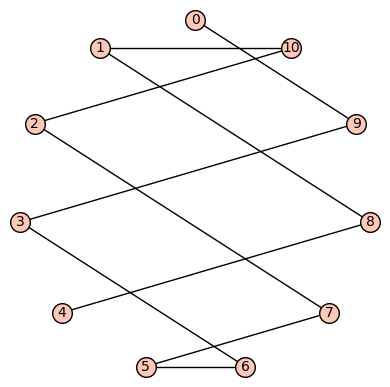

number of parallel pairs: 36.0


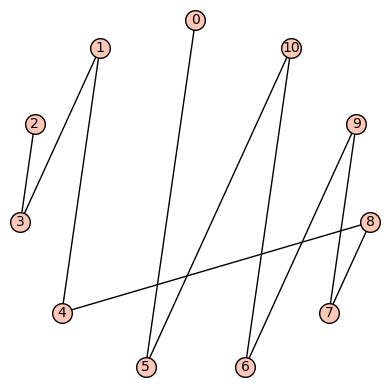

number of parallel pairs: 42.0


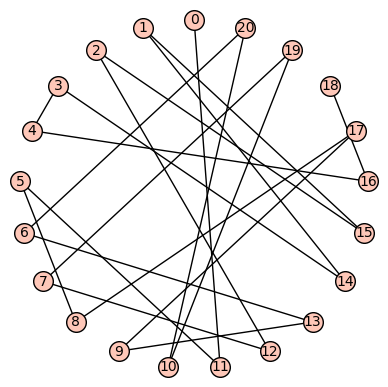

number of parallel pairs: 0.0


[0, 11, 5, 8, 17, 9, 13, 6, 20, 10, 19, 7, 12, 2, 15, 1, 14, 3, 4, 16, 18]

In [32]:
arranging_maximizing_parallels(10,9,True)
arranging_maximizing_parallels(10,5,True)
arranging_minimizing_parallels(20,14,True)

In [33]:
S=[0,18,1,19,6,12,7,13,19,14,11,15,4,20,5,21,2,16,3,17,8,9]
differences(S)

[18, 17, 18, 13, 6, 5, 6, 6, 5, 3, 4, 11, 16, 15, 16, 19, 14, 13, 14, 9, 1]

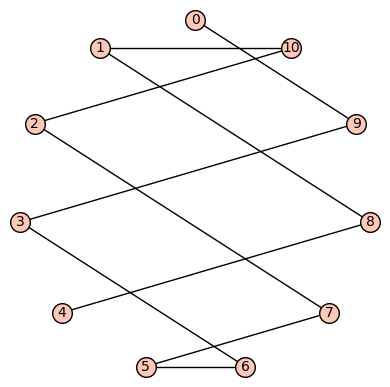

number of parallel pairs: 36.0
[0, 18, 6, 12, 10, 14, 4, 20, 2, 16, 8]


[18, 12, 6, 2, 4, 10, 16, 18, 14, 8]

In [35]:
S=arranging_maximizing_parallels(10,9,True)
Snew=[]
for i in S:
    Snew.append(2*i)
print(Snew)
differences(Snew)

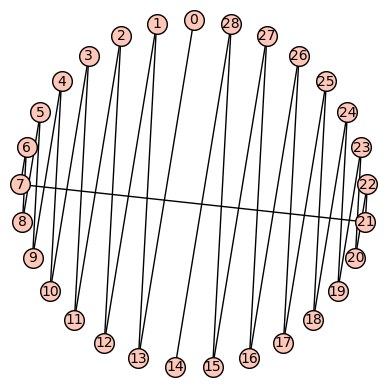

number of parallel pairs: 366.0


[13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14]

In [38]:
S=arranging_maximizing_parallels(28,14,True)
differences(S)

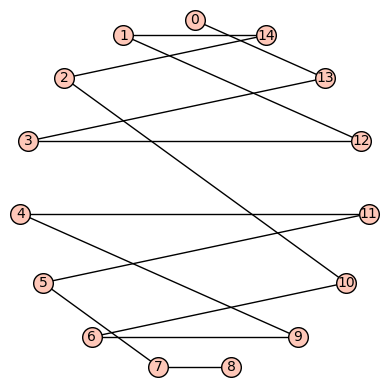

number of parallel pairs: 0.0
[13, 10, 9, 11, 13, 12, 8, 4, 3, 5, 7, 6, 2, 1]


In [8]:
n=14
k=13
S=arranging_minimizing_parallels(n,k,True)
print(differences(S))

In [ ]:
def arranging_minimizing_small_parallels(n,k,should_print):

    p = MixedIntegerLinearProgram(maximization=False,solver=my_solver)

    G=graphs.CompleteGraph(n+1)
    for e in G.edges():
        if e[1]-e[0] > k:
            G.delete_edge(e)
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for u in G.vertices():
        equation=0
        for e in G.edges_incident(u):
            equation+=x[e]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)
    
    for i in range(1,k+1):
        equation=0
        for e in G.edges():
            if e[1]-e[0] == i:
                equation+=x[e]
        if i>=2*k-n+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)

    objective=0
    y=p.new_variable(binary=True)
#    for e in G.edges():
#        for f in G.edges():
#            if are_parallel(e,f,n):
#                objective+=y[e,f]
    for e in G.edges():
        u,v,z=e
        parallels=nonenize_pairs(generate_parallels((u,v),n))
        for f in parallels:
            u,v,z=f
            if G.has_edge(u,v):
                objective+=y[e,f]
                p.add_constraint(x[e]+x[f]>=2*y[e,f])
        
    p.set_objective(objective)

    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of parallel pairs: "+str(sol))
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return lista

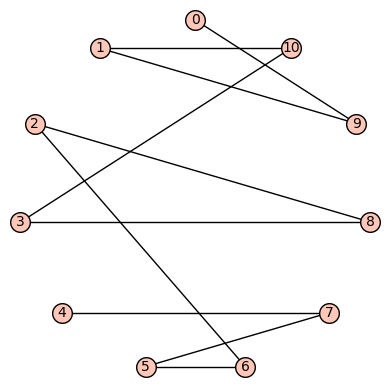

number of parallel pairs: 0.0
7.0
solution: [(0, 9), (1, 9), (1, 11), (2, 8), (2, 12), (3, 10), (3, 12), (4, 7), (4, 8), (5, 6), (5, 7), (6, 11)]
simmilarity: [(0, 9), (1, 9), (2, 8), (3, 10), (4, 7), (5, 6), (5, 7)]


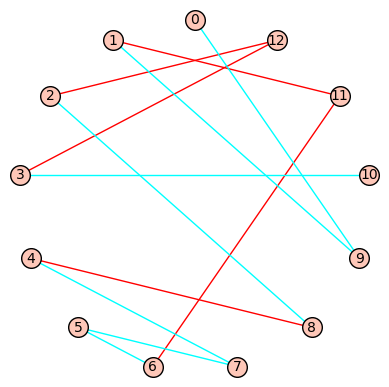

9.0
solution: [(0, 9), (1, 9), (1, 11), (2, 12), (2, 13), (3, 10), (3, 14), (4, 8), (4, 13), (5, 6), (5, 7), (6, 11), (7, 10), (8, 14)]
simmilarity: [(0, 9), (1, 9), (1, 11), (2, 12), (3, 10), (4, 8), (5, 6), (5, 7), (6, 11)]


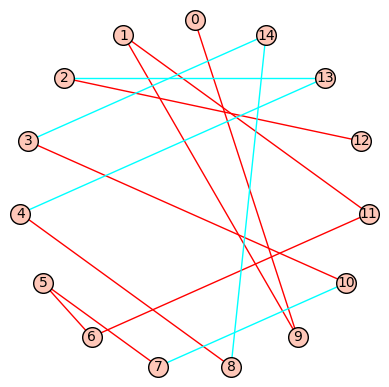

KeyboardInterrupt: 

In [22]:
n=12
k=10

nn=10
kk=9
S=arranging_minimizing_parallels(nn,kk,True)
restrictions=sequence_to_pairs(S)
for i in range(5):
    nn+=2
    kk+=1
    S=arranging_maximizing_simmilarity(nn,kk,restrictions)
    restrictions=sequence_to_pairs(S)



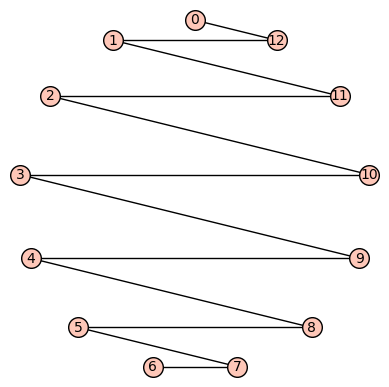

number of parallel pairs: 0.0


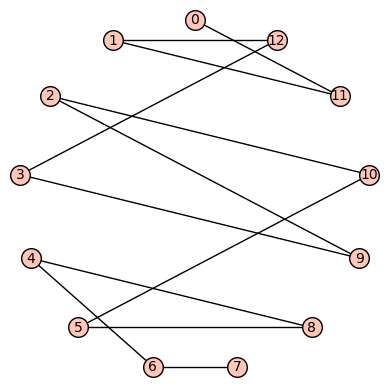

number of parallel pairs: 0.0


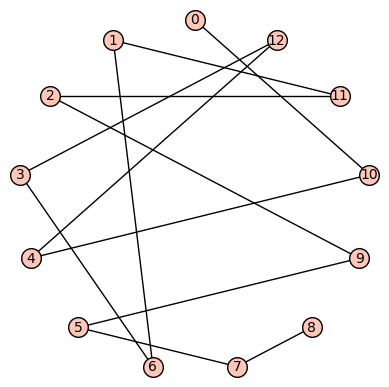

number of parallel pairs: 0.0
6
[0, 6, 11, 10, 12, 8, 3, 9, 5, 7, 4, 1, 2]
7
[0, 7, 4, 2, 9, 3, 8, 11, 12, 6, 10, 5, 1]
8
[0, 8, 3, 2, 7, 10, 4, 11, 9, 1, 5, 12, 6]
9
[0, 9, 1, 6, 12, 3, 10, 2, 5, 7, 8, 4, 11]


In [30]:
arranging_minimizing_parallels(12,12,True)
arranging_minimizing_parallels(12,11,True)
arranging_minimizing_parallels(12,10,True)
for k in range(6,10):
    print(k)
    print(arranging_with_restrictions(12,k,[(0,k)]))

In [12]:
for n in range(6,30):
    for k in range(ceil(n/2),n):
#        print(k)
#        print(test_solution_vertices(arranging_with_restrictions(n,k,[(0,k)]),k))
#        print(arranging_with_restrictions(n,k,[(0,k),(k,1),(1,n)]))
        print(arranging_with_restrictions(n,k,[(0,k),(k,1)]))

[0, 3, 1, 2, 5, 6, 4]
[0, 4, 1, 2, 6, 3, 5]
[0, 5, 1, 6, 3, 2, 4]
[0, 4, 1, 2, 6, 3, 5, 7]
[0, 5, 1, 2, 7, 3, 6, 4]
[0, 6, 1, 7, 3, 4, 2, 5]
[0, 4, 1, 5, 7, 8, 6, 3, 2]
[0, 5, 1, 4, 2, 6, 3, 8, 7]
[0, 6, 1, 4, 5, 3, 7, 2, 8]
[0, 7, 1, 8, 3, 6, 2, 4, 5]
[0, 5, 1, 2, 4, 7, 3, 8, 6, 9]
[0, 6, 1, 5, 9, 7, 4, 3, 8, 2]
[0, 7, 1, 8, 5, 6, 2, 4, 9, 3]
[0, 8, 1, 9, 3, 5, 6, 2, 7, 4]
[0, 5, 1, 3, 2, 7, 10, 9, 6, 4, 8]
[0, 6, 1, 4, 2, 8, 9, 5, 10, 7, 3]
[0, 7, 1, 6, 4, 9, 5, 8, 2, 3, 10]
[0, 8, 1, 7, 2, 10, 3, 6, 4, 5, 9]
[0, 9, 1, 10, 3, 7, 2, 8, 5, 4, 6]
[0, 6, 1, 7, 10, 5, 9, 11, 8, 4, 2, 3]
[0, 7, 1, 5, 3, 4, 9, 2, 8, 11, 6, 10]
[0, 8, 1, 7, 11, 6, 9, 3, 10, 2, 4, 5]
[0, 9, 1, 6, 3, 10, 2, 11, 5, 7, 8, 4]
[0, 10, 1, 11, 3, 7, 4, 9, 2, 8, 6, 5]
[0, 6, 1, 4, 9, 11, 5, 2, 3, 7, 8, 12, 10]
[0, 7, 1, 5, 2, 4, 9, 6, 12, 8, 3, 10, 11]
[0, 8, 1, 7, 12, 4, 9, 11, 5, 2, 3, 10, 6]
[0, 9, 1, 10, 2, 8, 11, 4, 6, 5, 12, 7, 3]
[0, 10, 1, 7, 8, 6, 3, 11, 2, 12, 5, 9, 4]
[0, 11, 1, 12, 3, 8, 6, 5, 9, 2, 10, 4

[0, 23, 1, 24, 3, 21, 2, 22, 5, 19, 4, 20, 7, 17, 6, 18, 9, 15, 8, 16, 11, 12, 14, 10, 13]
[0, 13, 1, 7, 2, 8, 4, 16, 9, 19, 23, 10, 18, 17, 6, 15, 5, 12, 3, 11, 14, 25, 20, 22, 24, 21]
[0, 14, 1, 10, 5, 19, 7, 6, 4, 8, 2, 12, 24, 15, 22, 11, 17, 9, 20, 23, 18, 25, 21, 13, 3, 16]
[0, 15, 1, 11, 23, 19, 6, 14, 4, 10, 17, 18, 25, 16, 5, 2, 13, 7, 20, 12, 3, 8, 22, 24, 9, 21]
[0, 16, 1, 9, 2, 15, 11, 25, 13, 23, 12, 3, 8, 19, 10, 7, 21, 22, 6, 14, 24, 18, 20, 5, 17, 4]
[0, 17, 1, 11, 19, 24, 9, 5, 16, 6, 3, 15, 2, 18, 4, 21, 10, 25, 12, 14, 23, 22, 8, 20, 13, 7]
[0, 18, 1, 15, 6, 21, 24, 25, 12, 8, 13, 2, 20, 4, 19, 3, 11, 23, 9, 22, 5, 17, 7, 14, 16, 10]
[0, 19, 1, 17, 25, 12, 2, 14, 21, 4, 20, 5, 11, 16, 15, 13, 9, 18, 7, 10, 24, 6, 23, 8, 22, 3]
[0, 20, 1, 14, 7, 22, 19, 3, 21, 4, 23, 5, 25, 8, 24, 12, 11, 6, 16, 2, 13, 17, 15, 9, 18, 10]
[0, 21, 1, 19, 2, 23, 7, 18, 12, 11, 14, 16, 8, 20, 6, 15, 10, 25, 5, 24, 17, 4, 22, 3, 13, 9]
[0, 22, 1, 19, 7, 23, 2, 15, 8, 14, 11, 20, 6, 16, 17,

In [53]:
def arranging_minimizing_parallels_with_restrictions(n,k,restrictions,should_print):

    p = MixedIntegerLinearProgram(maximization=False,solver=my_solver)

    G=graphs.CompleteGraph(n+1)
    for e in G.edges():
        if e[1]-e[0] > k:
            G.delete_edge(e)
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for u in G.vertices():
        equation=0
        for e in G.edges_incident(u):
            equation+=x[e]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)
    
    for i in range(1,k+1):
        equation=0
        for e in G.edges():
            if e[1]-e[0] == i:
                equation+=x[e]
        if i>=2*k-n+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)

    objective=0
    y=p.new_variable(binary=True)
#    for e in G.edges():
#        for f in G.edges():
#            if are_parallel(e,f,n):
#                objective+=y[e,f]
    for e in G.edges():
        u,v,z=e
        parallels=nonenize_pairs(generate_parallels((u,v),n))
        for f in parallels:
            u,v,z=f
            if G.has_edge(u,v):
                objective+=y[e,f]
                p.add_constraint(x[e]+x[f]>=2*y[e,f])
                
    X=Graph(restrictions)
    for e in G.edges():
        if X.has_edge(e):
            p.add_constraint(x[e]==1)
        
    p.set_objective(objective)

    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of parallel pairs: "+str(sol))
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return lista

In [58]:
for n in range(6,30):
    for k in range(ceil(n/2),n):
#        print(k)
#        print(test_solution_vertices(arranging_with_restrictions(n,k,[(0,k)]),k))
        print(arranging_minimizing_parallels_with_restrictions(n,k,[(0,k),(k,1)],False))

[0, 3, 1, 2, 5, 4, 6]
[0, 4, 1, 2, 6, 3, 5]
[0, 5, 1, 6, 3, 2, 4]
[0, 4, 1, 3, 5, 2, 6, 7]
[0, 5, 1, 2, 7, 3, 6, 4]
[0, 6, 1, 7, 3, 4, 2, 5]
[0, 4, 1, 5, 7, 8, 6, 3, 2]
[0, 5, 1, 4, 2, 6, 3, 8, 7]
[0, 6, 1, 4, 5, 3, 7, 2, 8]
[0, 7, 1, 8, 3, 6, 2, 4, 5]
[0, 5, 1, 2, 4, 7, 3, 8, 6, 9]
[0, 6, 1, 5, 9, 7, 4, 3, 8, 2]
[0, 7, 1, 8, 5, 6, 2, 4, 9, 3]
[0, 8, 1, 9, 3, 7, 2, 5, 4, 6]
[0, 5, 1, 3, 2, 7, 10, 9, 6, 4, 8]
[0, 6, 1, 4, 2, 8, 9, 5, 10, 7, 3]
[0, 7, 1, 6, 4, 9, 5, 8, 2, 3, 10]
[0, 8, 1, 7, 2, 10, 3, 6, 4, 5, 9]
[0, 9, 1, 10, 3, 7, 2, 8, 5, 4, 6]
[0, 6, 1, 7, 10, 5, 9, 11, 8, 4, 2, 3]
[0, 7, 1, 5, 3, 4, 9, 2, 8, 11, 6, 10]
[0, 8, 1, 7, 11, 6, 9, 3, 10, 2, 4, 5]
[0, 9, 1, 10, 2, 7, 3, 4, 11, 5, 8, 6]
[0, 10, 1, 11, 3, 7, 6, 4, 9, 2, 8, 5]
[0, 6, 1, 4, 9, 11, 5, 2, 3, 7, 8, 12, 10]
[0, 7, 1, 6, 2, 4, 8, 11, 10, 5, 12, 9, 3]
[0, 8, 1, 5, 4, 12, 6, 11, 9, 3, 10, 7, 2]
[0, 9, 1, 8, 6, 2, 10, 3, 12, 7, 4, 5, 11]
[0, 10, 1, 7, 8, 6, 3, 11, 2, 12, 5, 9, 4]
[0, 11, 1, 12, 3, 8, 6, 7, 4, 10, 2, 9

[0, 18, 1, 16, 3, 15, 10, 20, 13, 21, 7, 23, 12, 14, 17, 4, 19, 2, 11, 5, 9, 8, 22, 6, 24]
[0, 19, 1, 18, 2, 4, 22, 14, 9, 21, 6, 16, 7, 13, 12, 23, 10, 17, 3, 20, 5, 24, 8, 11, 15]
[0, 20, 1, 18, 14, 13, 11, 17, 4, 9, 16, 8, 23, 5, 19, 3, 15, 6, 24, 7, 10, 21, 2, 22, 12]
[0, 21, 1, 19, 3, 22, 7, 13, 15, 2, 23, 6, 14, 17, 10, 20, 8, 12, 11, 16, 5, 24, 4, 18, 9]
[0, 22, 1, 21, 3, 19, 4, 18, 9, 16, 5, 24, 2, 23, 6, 14, 13, 8, 20, 7, 17, 11, 15, 12, 10]
[0, 23, 1, 24, 3, 21, 2, 22, 5, 19, 4, 20, 7, 17, 6, 18, 9, 15, 8, 16, 11, 12, 14, 10, 13]
[0, 13, 1, 9, 21, 11, 19, 24, 22, 16, 7, 3, 10, 20, 15, 2, 5, 4, 8, 6, 17, 14, 23, 12, 18, 25]
[0, 14, 1, 8, 6, 20, 24, 19, 7, 4, 15, 5, 11, 12, 21, 25, 17, 22, 10, 2, 13, 23, 16, 3, 9, 18]
[0, 15, 1, 11, 23, 19, 6, 14, 4, 10, 17, 18, 25, 16, 5, 2, 13, 7, 20, 12, 3, 8, 22, 24, 9, 21]
[0, 16, 1, 9, 2, 15, 11, 25, 13, 23, 12, 3, 8, 19, 10, 7, 21, 22, 6, 14, 24, 18, 20, 5, 17, 4]
[0, 17, 1, 12, 15, 3, 20, 24, 14, 4, 18, 16, 22, 13, 5, 21, 9, 2, 7, 6, 19

KeyboardInterrupt: 

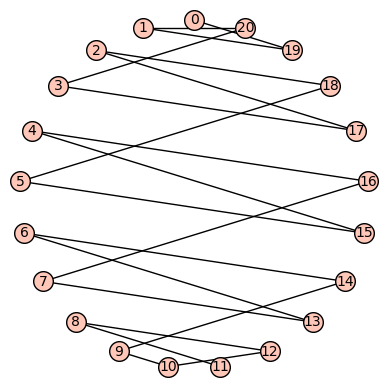

number of parallel pairs: 0.0


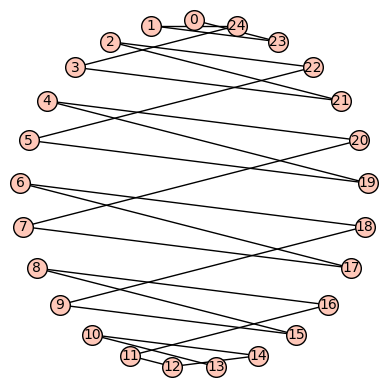

number of parallel pairs: 0.0


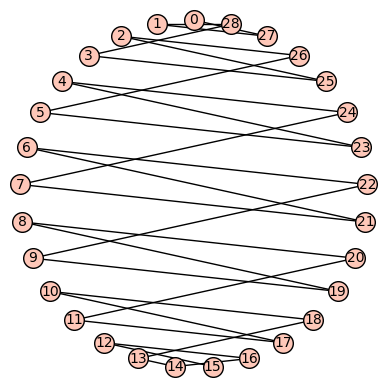

number of parallel pairs: 0.0


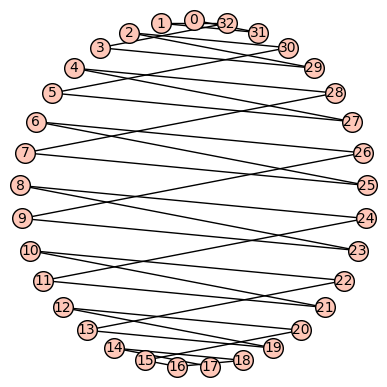

number of parallel pairs: 0.0


In [11]:
for k in range(4):
    n=20+4*k
    arranging_minimizing_parallels(n,n-1,True)

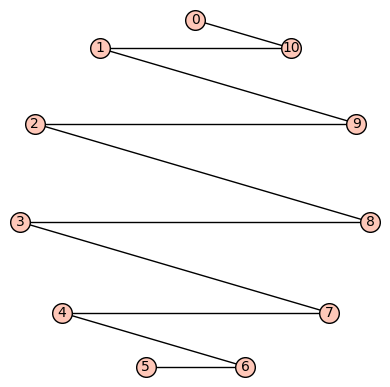

number of parallel pairs: 0.0


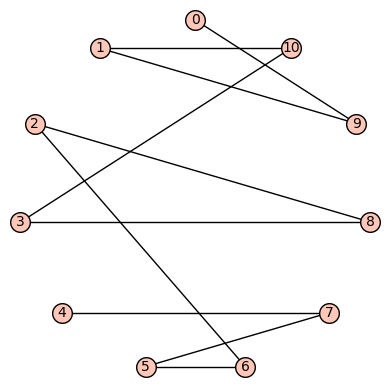

number of parallel pairs: 0.0


[0, 9, 1, 10, 3, 8, 2, 6, 5, 7, 4]

In [6]:
arranging_minimizing_parallels(10,10,True)
arranging_minimizing_parallels(10,9,True)


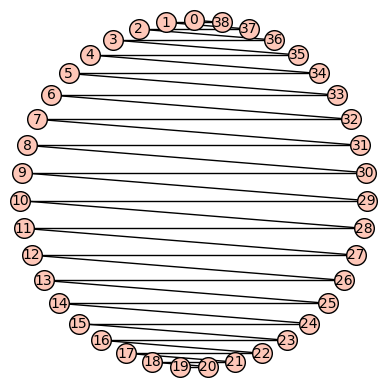

number of parallel pairs: 0.0
[0, 38, 1, 37, 2, 36, 3, 35, 4, 34, 5, 33, 6, 32, 7, 31, 8, 30, 9, 29, 10, 28, 11, 27, 12, 26, 13, 25, 14, 24, 15, 23, 16, 22, 17, 21, 18, 20, 19]
[38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


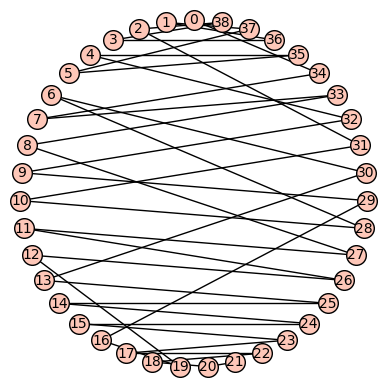

number of parallel pairs: 0.0
[0, 34, 7, 33, 8, 27, 11, 26, 12, 19, 16, 29, 9, 32, 4, 35, 5, 37, 1, 36, 3, 38, 2, 31, 10, 28, 6, 30, 13, 25, 14, 24, 15, 23, 17, 22, 18, 20, 21]
[34, 27, 26, 25, 19, 16, 15, 14, 7, 3, 13, 20, 23, 28, 31, 30, 32, 36, 35, 33, 35, 36, 29, 21, 18, 22, 24, 17, 12, 11, 10, 9, 8, 6, 5, 4, 2, 1]


In [8]:
n=38
P1=arranging_minimizing_parallels(n,n,True)
print(P1)
print(differences(P1))
P2=arranging_minimizing_parallels(n,n-2,True)
print(P2)
print(differences(P2))


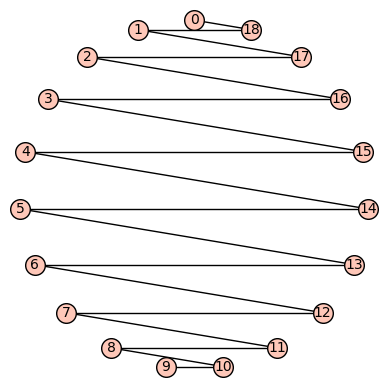

number of parallel pairs: 0.0
[0, 18, 1, 17, 2, 16, 3, 15, 4, 14, 5, 13, 6, 12, 7, 11, 8, 10, 9]
[18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


KeyboardInterrupt: 

In [15]:
n=18
P1=arranging_minimizing_parallels(n,n,True)
print(P1)
print(differences(P1))
P2=arranging_maximizing_simmilarity(n,n-2,sequence_to_pairs(P1))
print(P2)
print(differences(P2))


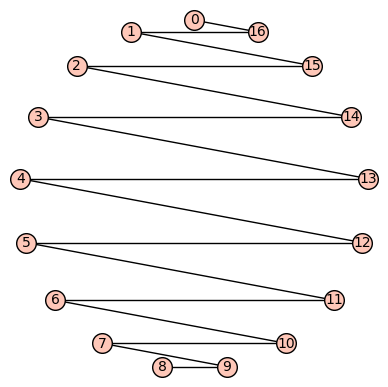

number of parallel pairs: 0.0
[0, 16, 1, 15, 2, 14, 3, 13, 4, 12, 5, 11, 6, 10, 7, 9, 8]
[16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


KeyboardInterrupt: 

In [13]:
n=16
P1=arranging_minimizing_parallels(n,n,True)
print(P1)
print(differences(P1))
P2=arranging_maximizing_simmilarity(n,n-1,sequence_to_pairs(P1))
print(P2)
print(differences(P2))

In [8]:
n=22
#P1=arranging_minimizing_parallels(n,n,True)
print(P1)
Partition=[[0], [22], [1, 21, 2], [20, 3, 19], [4, 18, 5], [17, 6, 16], [7, 15, 8],[14, 9, 13, 10, 12, 11]]

#[0]

R=[0,19,3,20,5,18,4,22,2,21,1,13,9,14,11,12,10,16,6,17,8,15,7]
print(test_solution_vertices(R,20))
differences(R)

#- 22,21
#+ 20,19
#* 22, 21, 18,15,12,9,6

[0, 22, 1, 21, 2, 20, 3, 19, 4, 18, 5, 17, 6, 16, 7, 15, 8, 14, 9, 13, 10, 12, 11]
True


[19, 16, 17, 15, 13, 14, 18, 20, 19, 20, 12, 4, 5, 3, 1, 2, 6, 10, 11, 9, 7, 8]

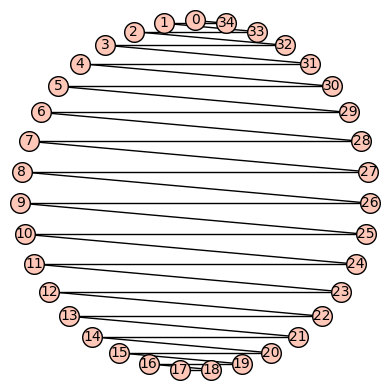

number of parallel pairs: 0.0
[0, 34, 1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17]


In [3]:
n=34
P1=arranging_minimizing_parallels(n,n,True)
print(P1)

In [ ]:
[0 
 34 
 1, 33, 2, 
 32, 3, 31, 
 4, 30, 5,
 
 29, 6, 28, 
 7, 27, 8, 
 26, 9, 25, 
 10, 24, 11,
 
 23, 12, 22, 
 13, 21, 14, 
 20, 15, 19, 
 16, 18, 17]


[0,31,3,32,5,30,4,34,2,33,1, 25,9,26,11,24,10,28,6,29,8,27,7,19,15,20,17,18,16,22,12,23,14,21,13]

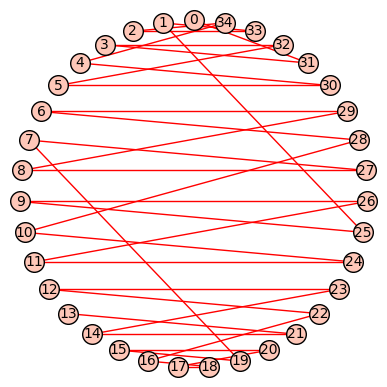

In [5]:
test_solution_vertices([0,31,3,32,5,30,4,34,2,33,1, 25,9,26,11,24,10,28,6,29,8,27,7,19,15,20,17,18,16,22,12,23,14,21,13],32)
show_solution_vertices([0,31,3,32,5,30,4,34,2,33,1, 25,9,26,11,24,10,28,6,29,8,27,7,19,15,20,17,18,16,22,12,23,14,21,13])

[0, 43, 3, 44, 5, 42, 4, 46, 2, 45, 1, 37, 9, 38, 11, 36, 10, 40, 6, 41, 8, 39, 7, 31, 15, 32, 17, 30, 16, 34, 12, 35, 14, 33, 13, 25, 21, 26, 23, 24, 22, 28, 18, 29, 20, 27, 19]
True


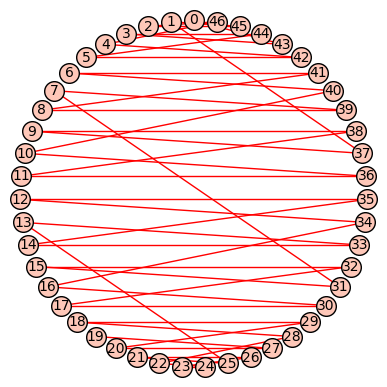

In [6]:
def increase(S):
    S2=[]
    for i in range(11):
        if S[i]>=30:
            S2.append(S[i]+12)
        else:
            S2.append(S[i])
    for i in range(11,23):
        if S[i]>=24:
            S2.append(S[i]+12)
        else:
            S2.append(S[i])
    for i in range(11,len(S)):
        S2.append(S[i]+6)
    return S2
print(S2)
print(test_solution_vertices(S2,44))
show_solution_vertices(S2)  

[0, 55, 3, 56, 5, 54, 4, 58, 2, 57, 1, 49, 9, 50, 11, 48, 10, 52, 6, 53, 8, 51, 7, 43, 15, 44, 17, 42, 16, 46, 12, 47, 14, 45, 13, 37, 21, 38, 23, 36, 22, 40, 18, 41, 20, 39, 19, 31, 27, 32, 29, 30, 28, 34, 24, 35, 26, 33, 25]
True


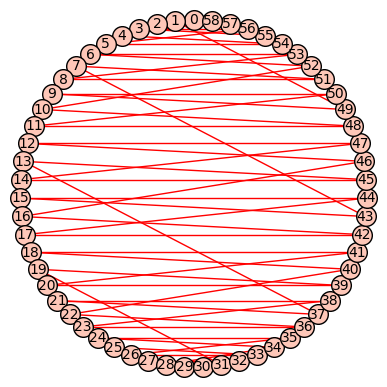

In [7]:
S3=increase(S2)
print(S3)
print(test_solution_vertices(S3,56))
show_solution_vertices(S3)

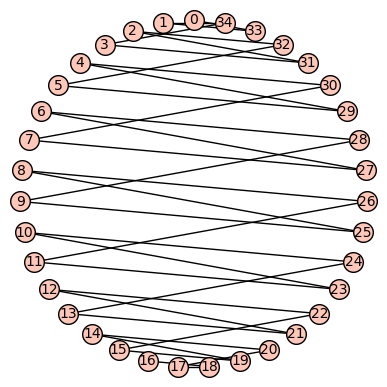

number of parallel pairs: 0.0
[0, 33, 1, 34, 3, 31, 2, 32, 5, 29, 4, 30, 7, 27, 6, 28, 9, 25, 8, 26, 11, 23, 10, 24, 13, 21, 12, 22, 15, 19, 14, 20, 17, 18, 16]


In [6]:
n=34
P1=arranging_minimizing_parallels(n,n-1,True)
print(P1)

In [ ]:
[0, 34, 1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17]

In [12]:
P=[0,17,3,18,10,11,9,12,8,13,7,14,1,19,2,20,4,16,5,15,6]
differences(P)
test_solution_vertices(P,18)

True

In [13]:
0
20
1,19,2
18,3,17
4,16,5

15,6,14
7,13,8
12,9,11
10

P=[0,17,3,18,5,16,4,20,2,19,1,11,9,12,10,14,6,15,8,13,7]
differences(P)

[17, 14, 15, 13, 11, 12, 16, 18, 17, 18, 10, 2, 3, 2, 4, 8, 9, 7, 5, 6]

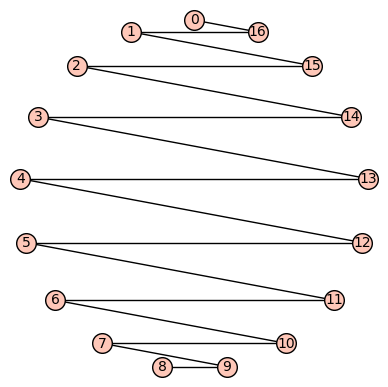

number of parallel pairs: 0.0
[0, 16, 1, 15, 2, 14, 3, 13, 4, 12, 5, 11, 6, 10, 7, 9, 8]
[16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
10.0
solution: [(0, 13), (1, 8), (1, 12), (2, 14), (2, 15), (3, 13), (3, 14), (4, 16), (4, 12), (5, 11), (6, 10), (6, 15), (7, 9), (7, 10), (8, 9), (11, 16)]
simmilarity: [(2, 14), (2, 15), (3, 13), (3, 14), (4, 12), (5, 11), (6, 10), (7, 9), (7, 10), (8, 9)]


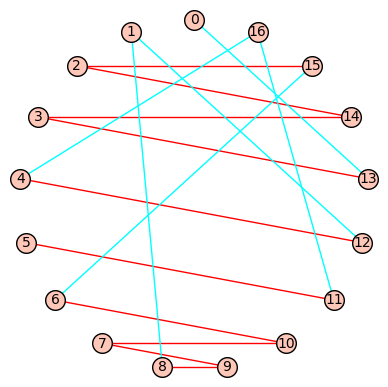

[0, 13, 3, 14, 2, 15, 6, 10, 7, 9, 8, 1, 12, 4, 16, 11, 5]
[13, 10, 11, 12, 13, 9, 4, 3, 2, 1, 7, 11, 8, 12, 5, 6]


In [12]:
n=16
P1=arranging_minimizing_parallels(n,n,True)
print(P1)
print(differences(P1))
P2=arranging_maximizing_simmilarity(n,n-3,sequence_to_pairs(P1))
print(P2)
print(differences(P2))

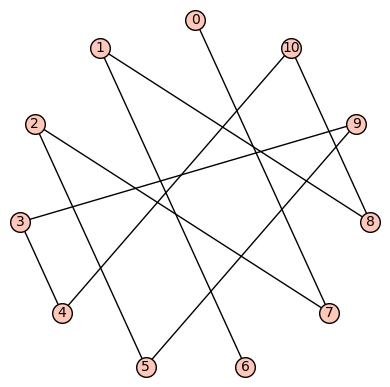

number of parallel pairs: 30.0


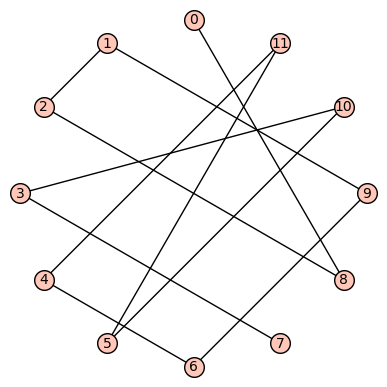

number of parallel pairs: 35.0


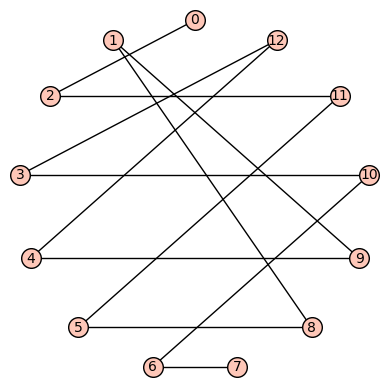

number of parallel pairs: 39.0


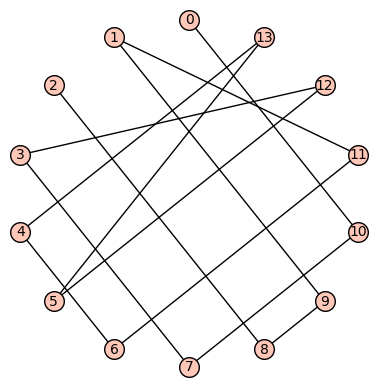

number of parallel pairs: 53.0


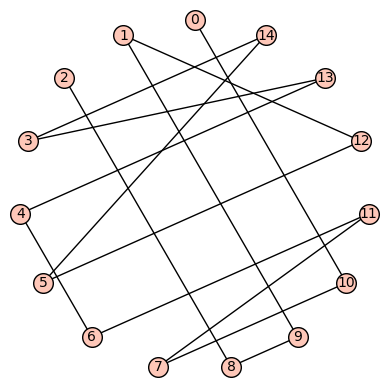

number of parallel pairs: 56.0


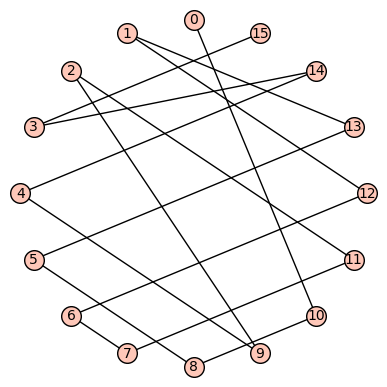

number of parallel pairs: 65.0


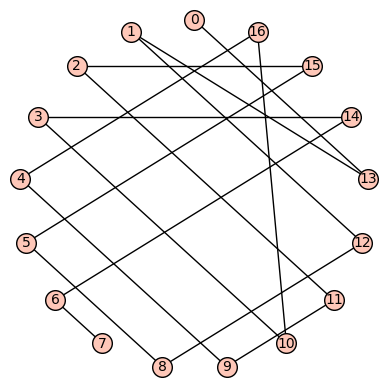

number of parallel pairs: 80.0


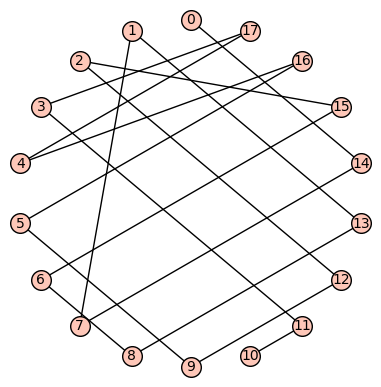

number of parallel pairs: 91.0


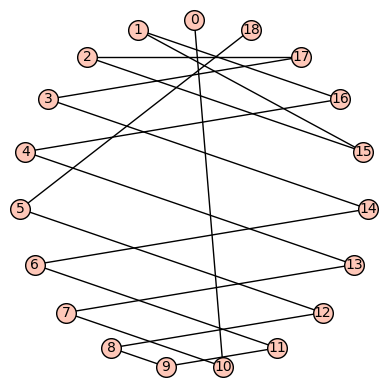

number of parallel pairs: 104.0


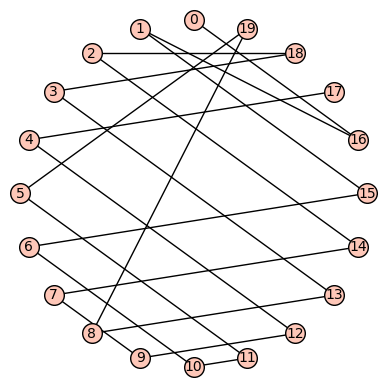

number of parallel pairs: 117.0


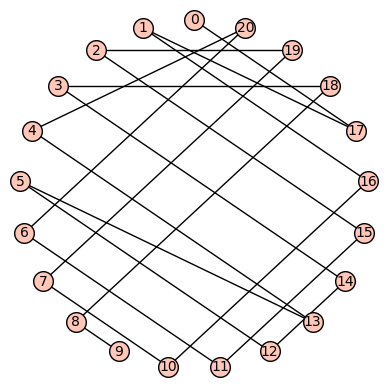

number of parallel pairs: 126.0


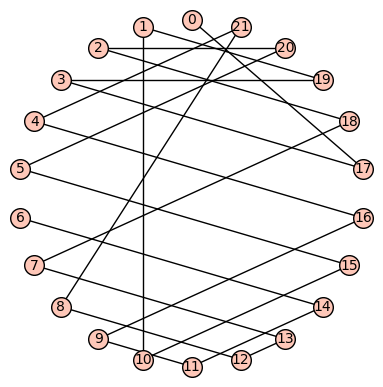

number of parallel pairs: 137.0


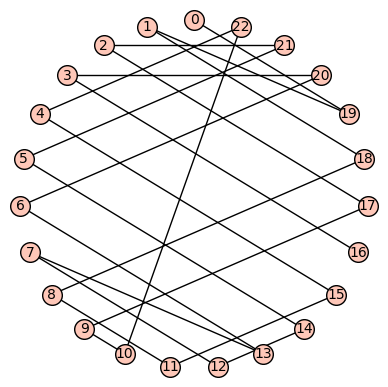

number of parallel pairs: 158.0


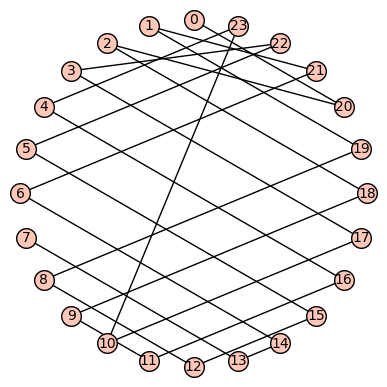

number of parallel pairs: 187.0


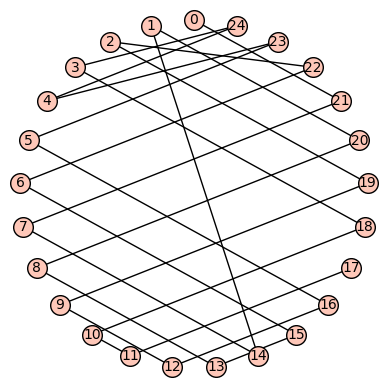

number of parallel pairs: 206.0


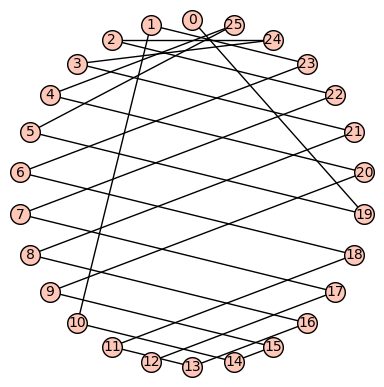

number of parallel pairs: 207.0


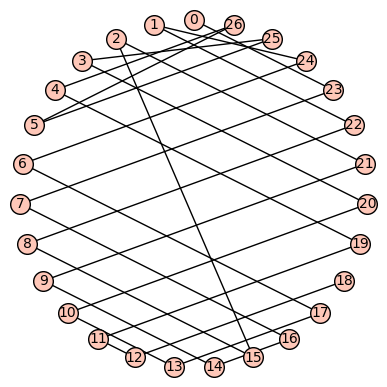

number of parallel pairs: 246.0


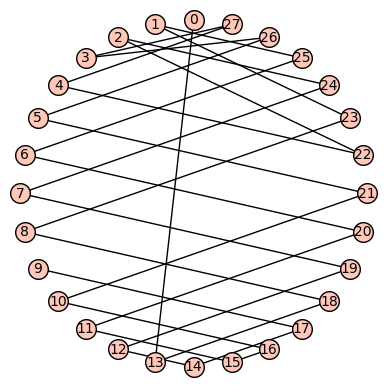

number of parallel pairs: 249.0


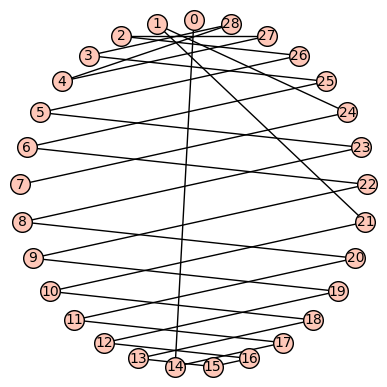

number of parallel pairs: 274.0


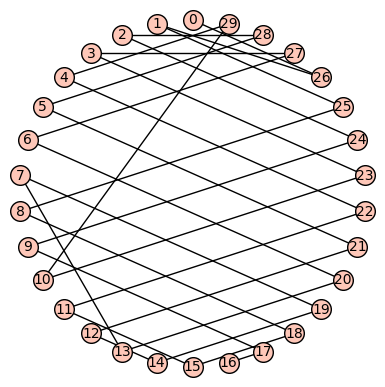

number of parallel pairs: 295.0


In [14]:
for n in range(10,30):
    P=arranging_maximizing_parallels(n,n-3,True)

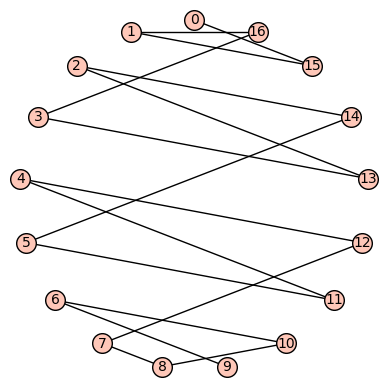

number of parallel pairs: 0.0
[0, 15, 1, 16, 3, 13, 2, 14, 5, 11, 4, 12, 7, 8, 10, 6, 9]
[15, 14, 15, 13, 10, 11, 12, 9, 6, 7, 8, 5, 1, 2, 4, 3]


KeyboardInterrupt: 

In [15]:
n=16
P1=arranging_minimizing_parallels(n,n-1,True)
print(P1)
print(differences(P1))
P2=arranging_maximizing_simmilarity(n,n-3,sequence_to_pairs(P1))
print(P2)
print(differences(P2))

In [35]:
def sequence_to_angles(S):
    angles=[]
    n=len(S)
    for i in range(1,n-1):
        u=S[i-1]
        v=S[i]
        w=S[i+1]    
        if u > v:
            e1=(v,u)
        else:
            e1=(u,v)
        if v > w:
            e2=(w,v)
        else:
            e2=(v,w)
        angles.append((e1,e2))
    return angles

def arranging_maximizing_similar_angles(n,k,S,should_print):
    p,x,G=default_arranging(n,k)
            
#    equação dos ângulos
    # y[e1,e2]=1 se e somente se x[e1]=1 e x[e2]=1
    y = p.new_variable(binary=True)
    
    angles=sequence_to_angles(S)
    equation=0
    for angle in angles:
        e1,e2=nonenize_pairs(angle)
        p.add_constraint(2*y[e1,e2]<=x[e1]+x[e2])
        equation+=y[e1,e2]
        
    p.set_objective(equation)                   
    
    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of similar angles: "+str(sol))
        print(p.get_values(y).items())
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return lista  
        

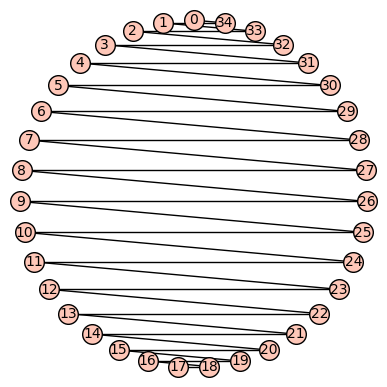

number of parallel pairs: 578.0


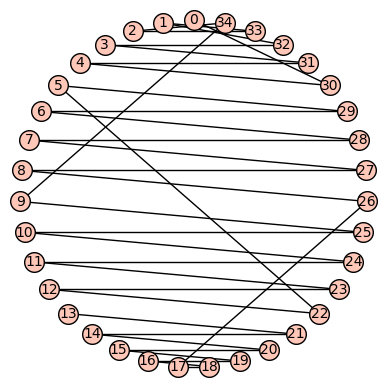

number of similar angles: 23.0
dict_items([(((0, 34, None), (1, 34, None)), 0), (((1, 34, None), (1, 33, None)), 0), (((1, 33, None), (2, 33, None)), 1), (((2, 33, None), (2, 32, None)), 0), (((2, 32, None), (3, 32, None)), 0), (((3, 32, None), (3, 31, None)), 1), (((3, 31, None), (4, 31, None)), 1), (((4, 31, None), (4, 30, None)), 1), (((4, 30, None), (5, 30, None)), 0), (((5, 30, None), (5, 29, None)), 0), (((5, 29, None), (6, 29, None)), 1), (((6, 29, None), (6, 28, None)), 1), (((6, 28, None), (7, 28, None)), 1), (((7, 28, None), (7, 27, None)), 1), (((7, 27, None), (8, 27, None)), 1), (((8, 27, None), (8, 26, None)), 1), (((8, 26, None), (9, 26, None)), 0), (((9, 26, None), (9, 25, None)), 0), (((9, 25, None), (10, 25, None)), 1), (((10, 25, None), (10, 24, None)), 1), (((10, 24, None), (11, 24, None)), 1), (((11, 24, None), (11, 23, None)), 1), (((11, 23, None), (12, 23, None)), 1), (((12, 23, None), (12, 22, None)), 1), (((12, 22, None), (13, 22, None)), 0), (((13, 22, None), (

In [46]:
n=34
S=arranging_maximizing_parallels(n,n,True)
S2=arranging_maximizing_similar_angles(n,n-2,S,True)

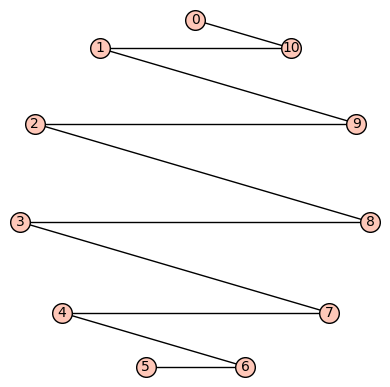

number of parallel pairs: 50.0


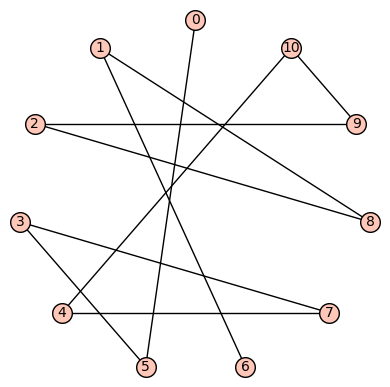

number of similar angles: 2.0
dict_items([(((0, 10, None), (1, 10, None)), 0), (((1, 10, None), (1, 9, None)), 0), (((1, 9, None), (2, 9, None)), 0), (((2, 9, None), (2, 8, None)), 1), (((2, 8, None), (3, 8, None)), 0), (((3, 8, None), (3, 7, None)), 0), (((3, 7, None), (4, 7, None)), 1), (((4, 7, None), (4, 6, None)), 0), (((4, 6, None), (5, 6, None)), 0)])


In [49]:
n=10
S=arranging_maximizing_parallels(n,n,True)
S2=arranging_maximizing_similar_angles(n,n-3,S,True)

In [6]:
print([0, 34, 1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17])
print([0,31,3,32,5,30,4,34,2,33,1, 25,9,26,11,24,10,28,6,29,8,27,7,19,15,20,17,18,16,22,12,23,14,21,13])


[0, 34, 1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17]
[0, 31, 3, 32, 5, 30, 4, 34, 2, 33, 1, 25, 9, 26, 11, 24, 10, 28, 6, 29, 8, 27, 7, 19, 15, 20, 17, 18, 16, 22, 12, 23, 14, 21, 13]


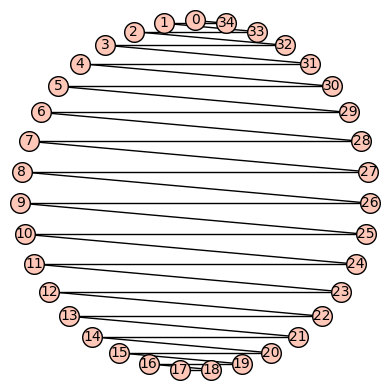

number of parallel pairs: 578.0


In [4]:
n=34
S=arranging_maximizing_parallels(n,n,True)

In [5]:
print(S)

[0, 34, 1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17]


In [9]:
def canonical(n):
    a=0
    b=n
    result=[a,b]
    for i in range(1,ceil(n/2)):
        a+=1
        b-=1
        result.append(a)
        result.append(b)
    if n%2==0:
        a+=1
        result.append(a)
    return result

def invert(lista):
    l=len(lista)
    if l==3:
        a,b,c=lista
        return [c,b,a]
    A=lista[0:l/2]
    B=lista[l/2:l]
    if l==6:
        return B+A
    else:
        return invert(B)+invert(A)

In [25]:
S=canonical(71)
print(S)

[0, 71, 1, 70, 2, 69, 3, 68, 4, 67, 5, 66, 6, 65, 7, 64, 8, 63, 9, 62, 10, 61, 11, 60, 12, 59, 13, 58, 14, 57, 15, 56, 16, 55, 17, 54, 18, 53, 19, 52, 20, 51, 21, 50, 22, 49, 23, 48, 24, 47, 25, 46, 26, 45, 27, 44, 28, 43, 29, 42, 30, 41, 31, 40, 32, 39, 33, 38, 34, 37, 35, 36]


In [ ]:
[0,70,5,69,]

In [58]:
S=invert(canonical(95))
print(S)
print(differences(S))
print(test_solution_vertices(S,95))
SS=invert(S)
print(SS)
print(differences(SS))
print(test_solution_vertices(SS,95))

[49, 47, 48, 45, 50, 46, 52, 44, 51, 42, 53, 43, 55, 41, 54, 39, 56, 40, 58, 38, 57, 36, 59, 37, 61, 35, 60, 33, 62, 34, 64, 32, 63, 30, 65, 31, 67, 29, 66, 27, 68, 28, 70, 26, 69, 24, 71, 25, 73, 23, 72, 21, 74, 22, 76, 20, 75, 18, 77, 19, 79, 17, 78, 15, 80, 16, 82, 14, 81, 12, 83, 13, 85, 11, 84, 9, 86, 10, 88, 8, 87, 6, 89, 7, 91, 5, 90, 3, 92, 4, 94, 2, 93, 0, 95, 1]
[2, 1, 3, 5, 4, 6, 8, 7, 9, 11, 10, 12, 14, 13, 15, 17, 16, 18, 20, 19, 21, 23, 22, 24, 26, 25, 27, 29, 28, 30, 32, 31, 33, 35, 34, 36, 38, 37, 39, 41, 40, 42, 44, 43, 45, 47, 46, 48, 50, 49, 51, 53, 52, 54, 56, 55, 57, 59, 58, 60, 62, 61, 63, 65, 64, 66, 68, 67, 69, 71, 70, 72, 74, 73, 75, 77, 76, 78, 80, 79, 81, 83, 82, 84, 86, 85, 87, 89, 88, 90, 92, 91, 93, 95, 94]
True
[0, 95, 1, 94, 2, 93, 3, 92, 4, 91, 5, 90, 6, 89, 7, 88, 8, 87, 9, 86, 10, 85, 11, 84, 12, 83, 13, 82, 14, 81, 15, 80, 16, 79, 17, 78, 18, 77, 19, 76, 20, 75, 21, 74, 22, 73, 23, 72, 24, 71, 25, 70, 26, 69, 27, 68, 28, 67, 29, 66, 30, 65, 31, 64, 3

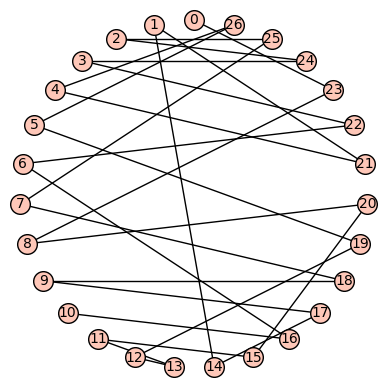

number of parallel pairs: 0.0
[0, 23, 8, 20, 15, 11, 13, 12, 19, 5, 26, 4, 21, 1, 14, 17, 9, 18, 7, 25, 2, 24, 3, 22, 6, 16, 10]
[0, 26, 1, 25, 2, 24, 3, 23, 4, 22, 5, 21, 6, 20, 7, 19, 8, 18, 9, 17, 10, 16, 11, 15, 12, 14, 13]


In [64]:
n=26
i=3
S=arranging_minimizing_parallels(n,n-i,True)
print(S)
print(canonical(n))

In [71]:
n=71
original=canonical(71)
print(original)
print(original[-48:])
print(differences(original[-48:]))
R=[0,67, 5, 66,]

[0, 71, 1, 70, 2, 69, 3, 68, 4, 67, 5, 66, 6, 65, 7, 64, 8, 63, 9, 62, 10, 61, 11, 60, 12, 59, 13, 58, 14, 57, 15, 56, 16, 55, 17, 54, 18, 53, 19, 52, 20, 51, 21, 50, 22, 49, 23, 48, 24, 47, 25, 46, 26, 45, 27, 44, 28, 43, 29, 42, 30, 41, 31, 40, 32, 39, 33, 38, 34, 37, 35, 36]
[12, 59, 13, 58, 14, 57, 15, 56, 16, 55, 17, 54, 18, 53, 19, 52, 20, 51, 21, 50, 22, 49, 23, 48, 24, 47, 25, 46, 26, 45, 27, 44, 28, 43, 29, 42, 30, 41, 31, 40, 32, 39, 33, 38, 34, 37, 35, 36]
[47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [4]:
n=74
i=1
S=arranging_minimizing_parallels(n,n-i,True)
i=2
S=arranging_minimizing_parallels(n,n-i,True)

KeyboardInterrupt: 

In [34]:
n=34
original=canonical(n)
print(original)

[0, 34, 1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17]


[1, 33, 2, 32, 3, 31, 4, 30, 5, 29, 6, 28, 7, 27, 8, 26, 9, 25, 10, 24, 11, 23, 12, 22, 13, 21, 14, 20, 15, 19, 16, 18, 17]
[(1, 33), (33, 2), (32, 3), (3, 31), (4, 30), (30, 5), (29, 6), (6, 28), (7, 27), (27, 8), (26, 9), (9, 25), (10, 24), (24, 11), (23, 12), (12, 22), (13, 21), (21, 14), (20, 15), (15, 19), (16, 18), (18, 17)]
começou a rodar


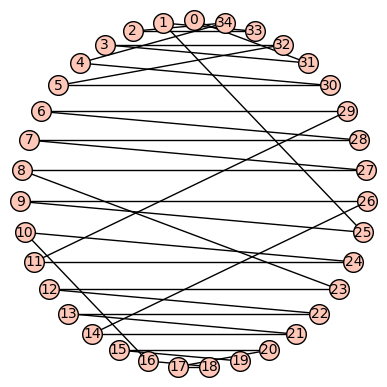

number of parallel pairs: 0.0


In [35]:
sub_original=original[2:]
print(sub_original)
forced=[]
for i in range(len(sub_original)/3):
    a=sub_original[3*i]
    b=sub_original[3*i+1]
    c=sub_original[3*i+2]
    forced.append((a,b))
    forced.append((b,c))
print(forced)
    
n=34
i=2
solucao=arranging_minimizing_parallels_forcing_edges(n,n-i,forced,True)

[0, 73, 1, 74, 3, 72, 2, 70, 4, 71, 6, 69, 5, 67, 7, 68, 9, 66, 8, 64, 10, 65, 12, 63, 11, 61, 13, 62, 15, 60, 14, 58, 16, 59, 18, 57, 17, 55, 19, 56, 21, 54, 20, 52, 22, 53, 24, 51, 23, 49, 25, 50, 27, 48, 26, 46, 28, 47, 30, 45, 29, 43, 31, 44, 33, 42, 32, 40, 34, 41, 36, 39, 35, 37, 38] 75 [73, 72, 73, 71, 69, 70, 68, 66, 67, 65, 63, 64, 62, 60, 61, 59, 57, 58, 56, 54, 55, 53, 51, 52, 50, 48, 49, 47, 45, 46, 44, 42, 43, 41, 39, 40, 38, 36, 37, 35, 33, 34, 32, 30, 31, 29, 27, 28, 26, 24, 25, 23, 21, 22, 20, 18, 19, 17, 15, 16, 14, 12, 13, 11, 9, 10, 8, 6, 7, 5, 3, 4, 2, 1]
True


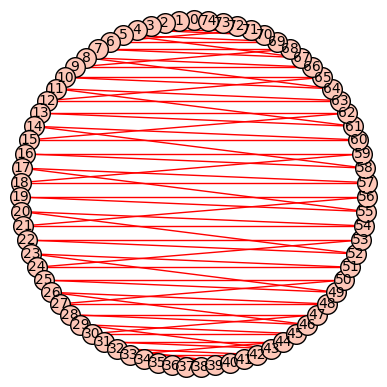

In [15]:
sol=[]
sol.append(original[0])
for i in range(24):
    a=original[3*i+1]
    b=original[3*i+2]
    c=original[3*i+3]
    sol.append(c)
    sol.append(b)
    sol.append(a)
sol.append(original[-1])
sol.append(original[-2])
print(sol,len(sol),differences(sol))
print(test_solution_vertices(sol,n-1))
show_solution_vertices(sol)

In [ ]:
sol=[]
sol.append(original[0])
for i in range(24):
    a=original[3*i+1]
    b=original[3*i+2]
    c=original[3*i+3]
    sol.append(c)
    sol.append(b)
    sol.append(a)
sol.append(original[-1])
sol.append(original[-2])
print(sol,len(sol),differences(sol))
print(test_solution_vertices(sol,n-1))
show_solution_vertices(sol)

In [19]:
new=[0,7,3,8,5,6,4,10,2,9,1]
print(differences(new))
test_solution_vertices(new,8)

[7, 4, 5, 3, 1, 2, 6, 8, 7, 8]


True

In [20]:
def arranging_minimizing_parallels_forcing_edges(n,k,forced,should_print):

    p = MixedIntegerLinearProgram(maximization=False,solver=my_solver)

    G=graphs.CompleteGraph(n+1)
    for e in G.edges():
        if e[1]-e[0] > k:
            G.delete_edge(e)
    
#    variável da aresta: x[e]=1 implica que e está no nosso caminho
    x = p.new_variable(binary=True)

#    equações dos vértices
    for u in G.vertices():
        equation=0
        for e in G.edges_incident(u):
            equation+=x[e]
        if u==0:
            p.add_constraint(equation==1)
        else:
            p.add_constraint(equation<=2)
    
    for i in range(1,k+1):
        equation=0
        for e in G.edges():
            if e[1]-e[0] == i:
                equation+=x[e]
        if i>=2*k-n+1:
            p.add_constraint(equation==2)
        else:
            p.add_constraint(equation==1)
            
    X=Graph(forced)
    for e in G.edges():
        if X.has_edge(e):
            p.add_constraint(x[e]==1)

    objective=0
    y=p.new_variable(binary=True)
#    for e in G.edges():
#        for f in G.edges():
#            if are_parallel(e,f,n):
#                objective+=y[e,f]
    for e in G.edges():
        u,v,z=e
        parallels=nonenize_pairs(generate_parallels((u,v),n))
        for f in parallels:
            u,v,z=f
            if G.has_edge(u,v):
                objective+=y[e,f]
                p.add_constraint(x[e]+x[f]>=2*y[e,f])
        
    p.set_objective(objective)
    
    print("começou a rodar")
    sol=p.solve()
    solution=p.get_values(x).items()
    R=[]
    for s in solution:
        if s[1]==1:
            R.append(s[0])
    H=Graph(R)

    while H.is_tree()==False:
        comps=H.connected_components()
        for comp in comps:
            X=H.subgraph(comp)
            if X.size() > X.order()-1:
                equation=0
                for e in X.edges():
                    equation+=x[e]
                p.add_constraint(equation<=X.order()-1)
        sol=p.solve()
        solution=p.get_values(x).items()
        R=[]
        for s in solution:
            if s[1]==1:
                R.append(s[0])
        H=Graph(R)

    if should_print:    
        H.show(layout="circular")
        print("number of parallel pairs: "+str(sol))
    lista=[0]
    u=0
    while H.order()>=2:
        v=H.neighbors(u)[0]
        H.delete_vertex(u)
        lista.append(v)
        u=v
    return lista

def forced_type1(n,k,gap):
    C=canonical(n)
    i=n-k
    CC=C[i+1:]
    result=[]
    for j in range(len(CC)/gap):
        for r in range(gap-1):
            a=CC[gap*j+r]
            b=CC[gap*j+r+1]
            if b>a:
                result.append((a,b))
            else:
                result.append((b,a))
    return result

In [23]:
n=12

k=n-2
forced=forced_type1(n,k,5)
print(forced)
arranging_minimizing_parallels_forcing_edges(n,k,forced,True)

[(2, 6), (2, 5), (3, 5), (3, 4)]
começou a rodar


MIPSolverException: Gurobi: The problem is infeasible

In [7]:
n=5
k=n-2
arranging_minimizing_parallels_forcing_edges(n,k,[(2,4),(2,3)],True)

começou a rodar


MIPSolverException: Gurobi: The problem is infeasible

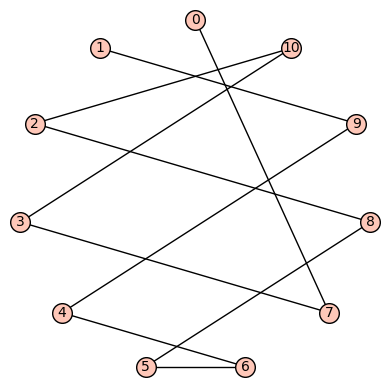

number of parallel pairs: 28.0
[7, 4, 7, 8, 6, 3, 1, 2, 5, 8]


In [3]:
P=arranging_maximizing_parallels(10,8,True)
print(differences(P))

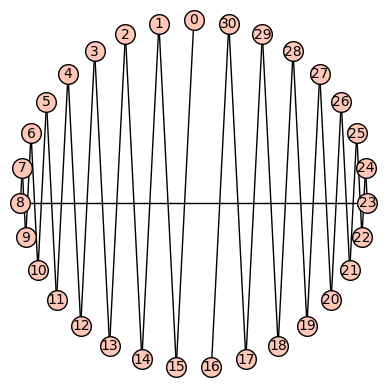

number of parallel pairs: 422.0


In [9]:
P=arranging_maximizing_parallels(30,15,True)


In [28]:
Can=canonical(18)
print(Can)
A=Can[0:1]
B=Can[1:10]
BB=B[::-1]
#print(Can[1:10:-1])
C=Can[10:19]
CC=C[::-1]
print(A)
print(BB)
print(CC)
new=A+BB+CC
print(new)
A=new[0:6]
print("A=",A)
B=new[6:9]
print("B=",B)
C=new[9:19]
print("C=",C)
result=A+B[::-1]+C
print(result)
print(test_solution_vertices(result,16))

[0, 18, 1, 17, 2, 16, 3, 15, 4, 14, 5, 13, 6, 12, 7, 11, 8, 10, 9]
[0]
[14, 4, 15, 3, 16, 2, 17, 1, 18]
[9, 10, 8, 11, 7, 12, 6, 13, 5]
[0, 14, 4, 15, 3, 16, 2, 17, 1, 18, 9, 10, 8, 11, 7, 12, 6, 13, 5]
A= [0, 14, 4, 15, 3, 16]
B= [2, 17, 1]
C= [18, 9, 10, 8, 11, 7, 12, 6, 13, 5]
[0, 14, 4, 15, 3, 16, 1, 17, 2, 18, 9, 10, 8, 11, 7, 12, 6, 13, 5]
True


In [37]:
def reverse(lista,init,end):
    A=lista[0:init]
    B=lista[init:end]
    C=lista[end:len(lista)]
    return A+B[::-1]+C

def solution_k_2(n):
    Can=canonical(n)
    step1=reverse(Can,2,5)
    for i in range(n/9):
        step1=reverse(step1,9*i+1,9*i+10)
    return step1

In [41]:
n=36
sol=solution_k_2(n)
print(sol)
print(test_solution_vertices(sol,n-2))

[0, 32, 4, 33, 3, 34, 1, 35, 2, 36, 9, 28, 8, 29, 7, 30, 6, 31, 5, 23, 13, 24, 12, 25, 11, 26, 10, 27, 18, 19, 17, 20, 16, 21, 15, 22, 14]
True


In [32]:
Can=canonical(18)
print(Can)
step1=reverse(Can,2,5)
print(step1)
step2=reverse(step1,1,10)
print(step2)
step3=reverse(step2,10,len(Can))
print(step3)
print(test_solution_vertices(step3,16))

[0, 18, 1, 17, 2, 16, 3, 15, 4, 14, 5, 13, 6, 12, 7, 11, 8, 10, 9]
[0, 18, 2, 17, 1, 16, 3, 15, 4, 14, 5, 13, 6, 12, 7, 11, 8, 10, 9]
[0, 14, 4, 15, 3, 16, 1, 17, 2, 18, 5, 13, 6, 12, 7, 11, 8, 10, 9]
[0, 14, 4, 15, 3, 16, 1, 17, 2, 18, 9, 10, 8, 11, 7, 12, 6, 13, 5]
True


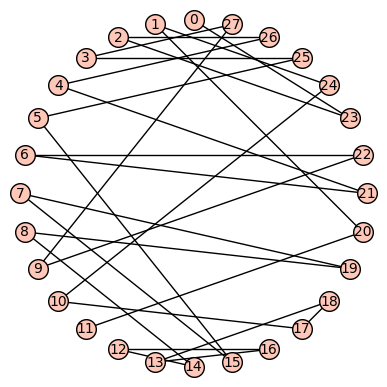

[0,
 23,
 2,
 26,
 4,
 21,
 6,
 22,
 9,
 27,
 3,
 25,
 5,
 15,
 7,
 19,
 8,
 14,
 12,
 16,
 13,
 18,
 17,
 10,
 24,
 1,
 20,
 11]

In [9]:
arranging(27,24
        ,True)

In [10]:
for n in range(9,40):
    print(n)
    try:
      print(arranging_with_restrictions_spec_finishing(n,n-3,[],n))
    except:
      print("An exception occurred")

9
An exception occurred
10
[0, 7, 9, 2, 8, 3, 6, 1, 5, 4, 10]
11
[0, 7, 1, 6, 8, 5, 9, 2, 10, 4, 3, 11]
12
An exception occurred
13
An exception occurred
14
[0, 11, 1, 8, 6, 5, 9, 3, 12, 7, 10, 2, 13, 4, 14]
15
[0, 7, 8, 10, 4, 12, 1, 11, 6, 9, 5, 14, 2, 13, 3, 15]
16
An exception occurred
17
An exception occurred
18
[0, 15, 6, 17, 3, 16, 1, 14, 2, 12, 7, 10, 8, 9, 13, 5, 11, 4, 18]
19
[0, 16, 2, 12, 5, 14, 1, 17, 3, 18, 6, 10, 9, 11, 8, 13, 7, 15, 4, 19]
20
An exception occurred
21
An exception occurred
22
An exception occurred
23
An exception occurred
24
An exception occurred
25
An exception occurred
26
An exception occurred
27
An exception occurred
28
An exception occurred
29
An exception occurred
30
An exception occurred
31
An exception occurred
32
An exception occurred
33
An exception occurred
34
An exception occurred
35
An exception occurred
36
An exception occurred
37
An exception occurred
38
An exception occurred
39
An exception occurred


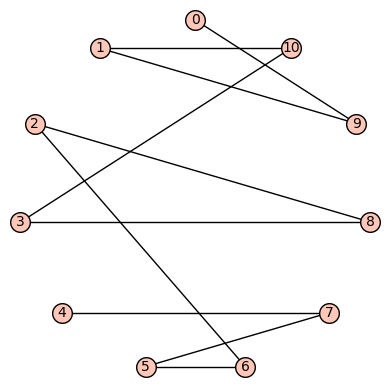

number of parallel pairs: 0.0


[0, 9, 1, 10, 3, 8, 2, 6, 5, 7, 4]

In [6]:
arranging_minimizing_parallels(10,9,True)

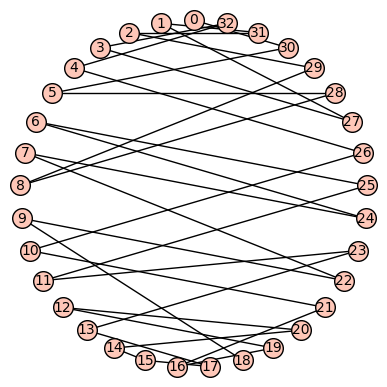

number of parallel pairs: 0.0


[0,
 30,
 5,
 28,
 8,
 29,
 2,
 31,
 1,
 27,
 3,
 32,
 4,
 26,
 10,
 21,
 16,
 19,
 12,
 20,
 14,
 15,
 17,
 13,
 23,
 11,
 25,
 6,
 24,
 7,
 22,
 9,
 18]

In [14]:
arranging_minimizing_parallels(32,30,True)

In [10]:
canonical(17)

[0, 17, 1, 16, 2, 15, 3, 14, 4, 13, 5, 12, 6, 11, 7, 10, 8, 9]

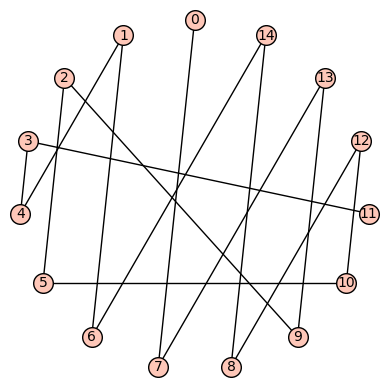

number of parallel pairs: 68.0


[0, 7, 13, 9, 2, 5, 10, 12, 8, 14, 6, 1, 4, 3, 11]

In [7]:
arranging_maximizing_parallels(14,8,True)

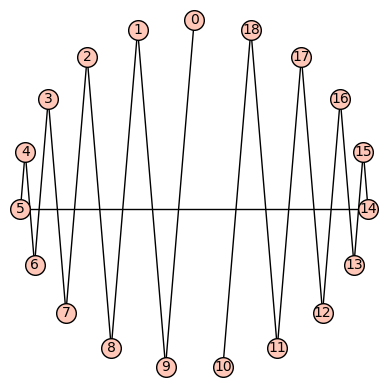

number of parallel pairs: 146.0


[0, 9, 1, 8, 2, 7, 3, 6, 4, 5, 14, 15, 13, 16, 12, 17, 11, 18, 10]

In [6]:
arranging_maximizing_parallels(18,9,True)

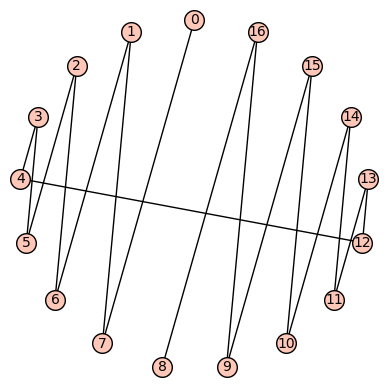

number of parallel pairs: 114.0


[0, 7, 1, 6, 2, 5, 3, 4, 12, 13, 11, 14, 10, 15, 9, 16, 8]

In [5]:
arranging_maximizing_parallels(16,8,True)

In [3]:
arranging_maximizing_parallels(22,15,True)

ModuleNotFoundError: No module named 'sage.numerical.backends.gurobi_backend'